In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
from scipy import stats

In [36]:
pd.set_option('display.min_rows', 20)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [37]:
df = pd.read_csv('mubawab_listings_clean.csv')
df.head()

,Type,Localisation,Price,Area,Rooms,Bedrooms,Bathrooms,Floor,Other_tags,Price_m2
0,Appartements,Casablanca Finance City,22000,219.0,4.0,3.0,3.0,11.0,"['Nouveau', ""Moins d'un an""]",100.456621
1,Appartements,Anfa,1230000,86.0,3.0,2.0,2.0,1.0,"['Bon état', '10-20 ans']",14302.325581
2,Appartements,La Gironde,900000,86.0,3.0,2.0,1.0,5.0,"['Bon état', '10-20 ans']",10465.116279
3,Appartements,Bourgogne Ouest,2400000,180.0,5.0,3.0,3.0,3.0,"['Bon état', '10-20 ans']",13333.333333
4,Appartements,Les princesses,1550000,120.0,5.0,3.0,2.0,5.0,"['Bon état', '5-10 ans']",12916.666667


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          1172 non-null   object 
 1   Localisation  1172 non-null   object 
 2   Price         1172 non-null   int64  
 3   Area          1172 non-null   float64
 4   Rooms         1172 non-null   float64
 5   Bedrooms      1172 non-null   float64
 6   Bathrooms     1172 non-null   float64
 7   Floor         1172 non-null   float64
 8   Other_tags    1172 non-null   object 
 9   Price_m2      1172 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 91.7+ KB


In [39]:
df['Other_tags'] = df.Other_tags.apply(eval)


In [40]:
def to_1D(series):
    '''
    Transform list elements of a seriers into a single series of all entries
    '''
    return pd.Series([x for _list in series for x in _list])

#Check unique elements found in the Other tags lists
other_tags_unique = to_1D(df.Other_tags).unique()
display(other_tags_unique)

#Check their frequency
other_tags_frq = to_1D(df.Other_tags).value_counts()
display(other_tags_frq)


array(['Nouveau', "Moins d'un an", 'Bon état', '10-20 ans', '5-10 ans',
       '1-5 ans', 'À rénover', '30-50 ans', '20-30 ans', '50-70 ans'],
      dtype=object)

Bon état         735
10-20 ans        313
Nouveau          292
5-10 ans         259
1-5 ans          131
À rénover         96
Moins d'un an     88
20-30 ans         76
30-50 ans         13
50-70 ans          2
Name: count, dtype: int64

In [41]:
current_state_tags = ['Bon état','Nouveau','À rénover']
current_state_tag_freq = other_tags_frq[current_state_tags]

age_tags = ["Moins d'un an",'1-5 ans','5-10 ans','10-20 ans','20-30 ans','30-50 ans','50-70 ans']
age_tag_freq = other_tags_frq[age_tags]

In [42]:
def to_var(list_of_tags, var_tags):
    for tag in var_tags:
        if tag in list_of_tags:
            return tag
    else:
        return np.nan

df_exp = df.copy()
df_exp['Current_state'] = df.Other_tags.apply(lambda x: to_var(x,current_state_tags))
df_exp['Age'] = df.Other_tags.apply(lambda x: to_var(x,age_tags))

C:\Users\R.BENZARIA\AppData\Local\Temp\ipykernel_36784\1848238989.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g= sns.countplot(data=df_exp,
C:\Users\R.BENZARIA\AppData\Local\Temp\ipykernel_36784\1848238989.py:8: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  g= sns.countplot(data=df_exp,
C:\Users\R.BENZARIA\AppData\Local\Temp\ipykernel_36784\1848238989.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g= sns.countplot(data=df_exp,
C:\Users\R.BENZARIA\AppData\Local\Temp\ipykernel_36784\1848238989.py:17: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  g= sns.countplot(data=df_exp,


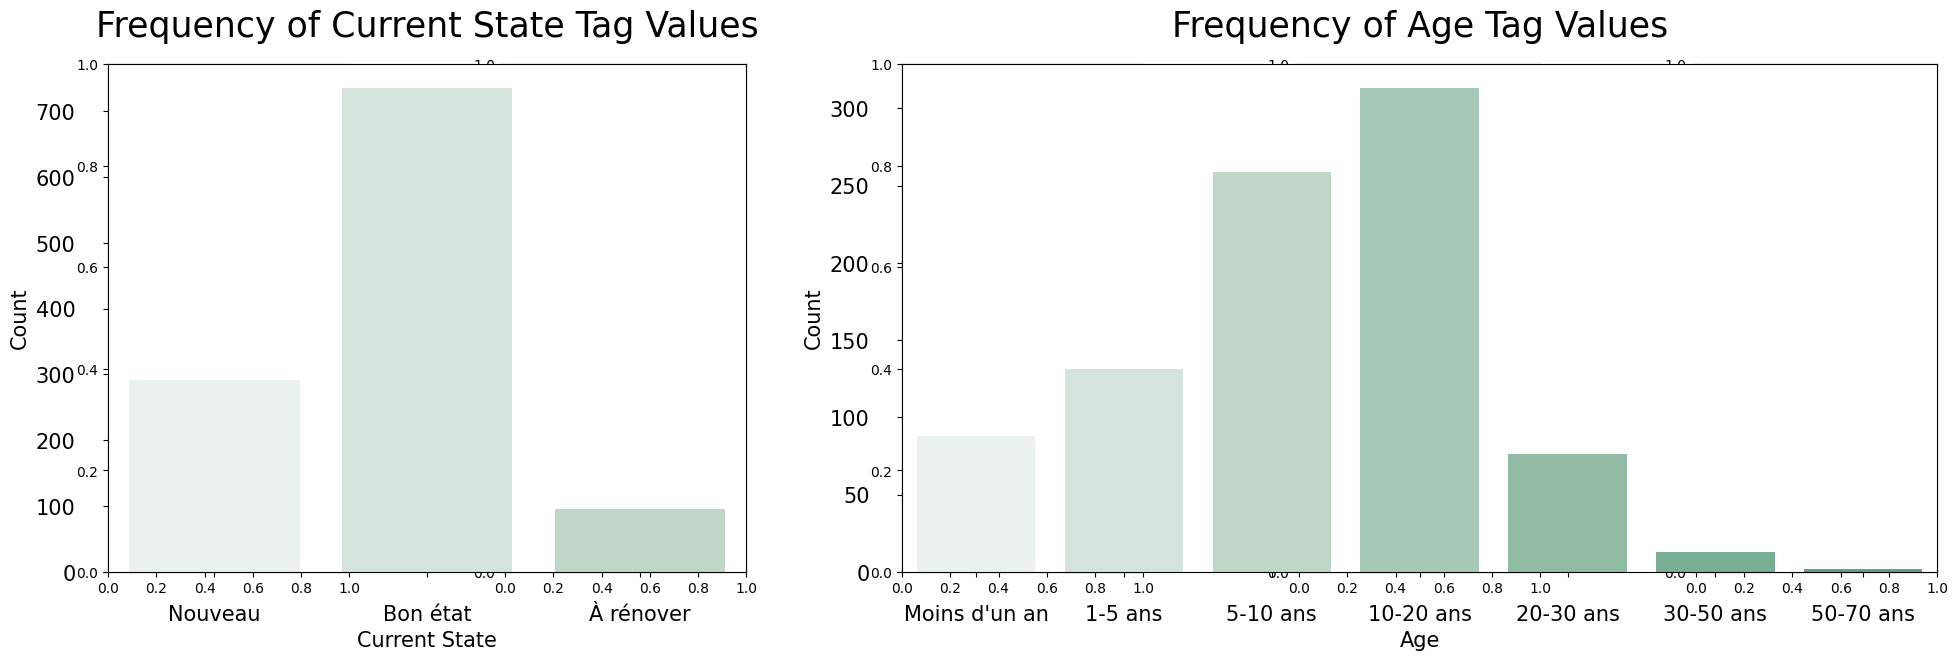

In [44]:
#plt.style.use('seaborn-whitegrid')
cust_pal = sns.color_palette(sns.light_palette('#0d874b',10))
fig, axes = plt.subplots(1,5,figsize = (20,7))

ax1 = plt.subplot2grid((1,5),(0,0),colspan = 2)
ax2 = plt.subplot2grid((1,5),(0,2),colspan = 3)

g= sns.countplot(data=df_exp,
                 x= 'Current_state',
                 palette = cust_pal,
                 ax = ax1)
ax1.tick_params(axis='both', which='major', labelsize=15,pad=20)
ax1.set_title('Frequency of Current State Tag Values',fontsize = 25,pad = 20)
ax1.set_xlabel('Current State',fontsize = 15)
ax1.set_ylabel('Count',fontsize = 15)

g= sns.countplot(data=df_exp,
                 x= 'Age',
                 palette = cust_pal,
                 ax = ax2,
                 order = ["Moins d'un an",'1-5 ans','5-10 ans','10-20 ans','20-30 ans','30-50 ans','50-70 ans'])
ax2.tick_params(axis='both', which='major', labelsize=15,pad=20)
ax2.set_title('Frequency of Age Tag Values',fontsize = 25,pad = 20)
ax2.set_xlabel('Age',fontsize = 15)
ax2.set_ylabel('Count',fontsize = 15)


plt.tight_layout()
plt.show()


C:\Users\R.BENZARIA\AppData\Local\Temp\ipykernel_36784\2131404691.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df_exp, palette=cust_pal, ax=ax)
C:\Users\R.BENZARIA\AppData\Local\Temp\ipykernel_36784\2131404691.py:5: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(x='Type', data=df_exp, palette=cust_pal, ax=ax)


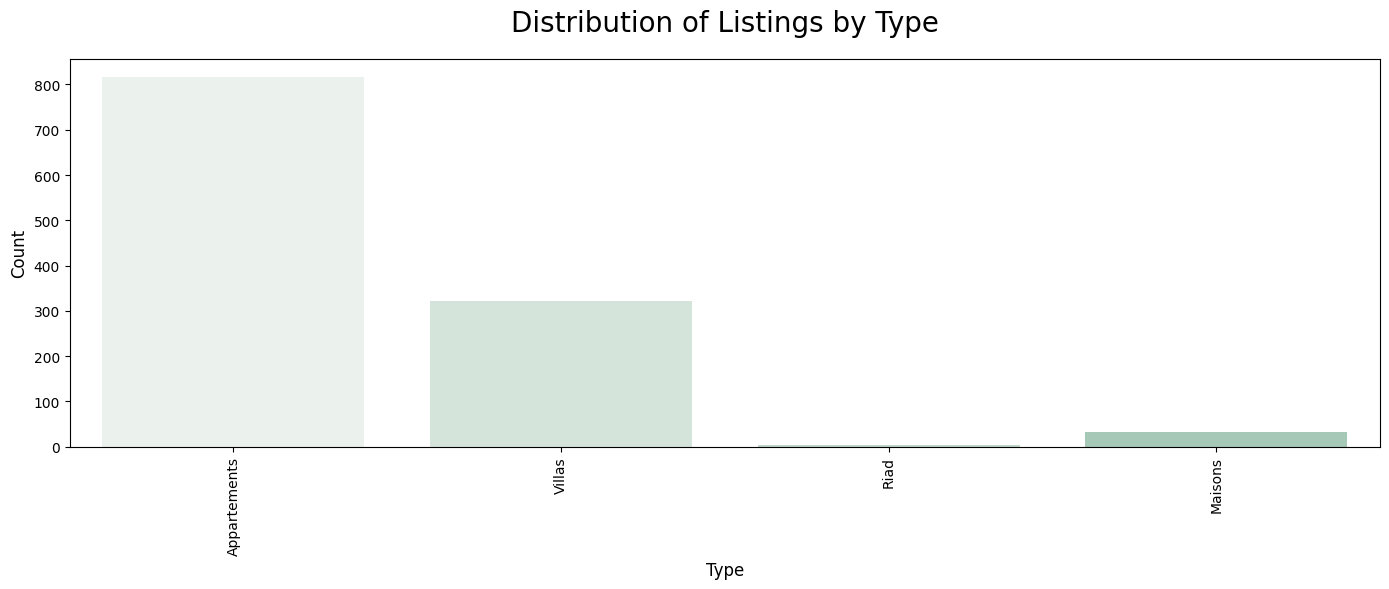

In [45]:
#sns.set_theme("whitegrid")     # or sns.set_style("whitegrid")

# now build your plot
fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='Type', data=df_exp, palette=cust_pal, ax=ax)
ax.set_title('Distribution of Listings by Type', fontsize=20, pad=20)
ax.set_xlabel('Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [46]:

#Explore the distribution of types
df_exp['Type'].value_counts()

Type
Appartements    816
Villas          321
Maisons          32
Riad              3
Name: count, dtype: int64

In [47]:
#merging 'Riad' and 'Maisons' into 'Villas'
df_exp['Type'] = df_exp['Type'].replace('Riad','Villas').replace('Maisons','Villas')

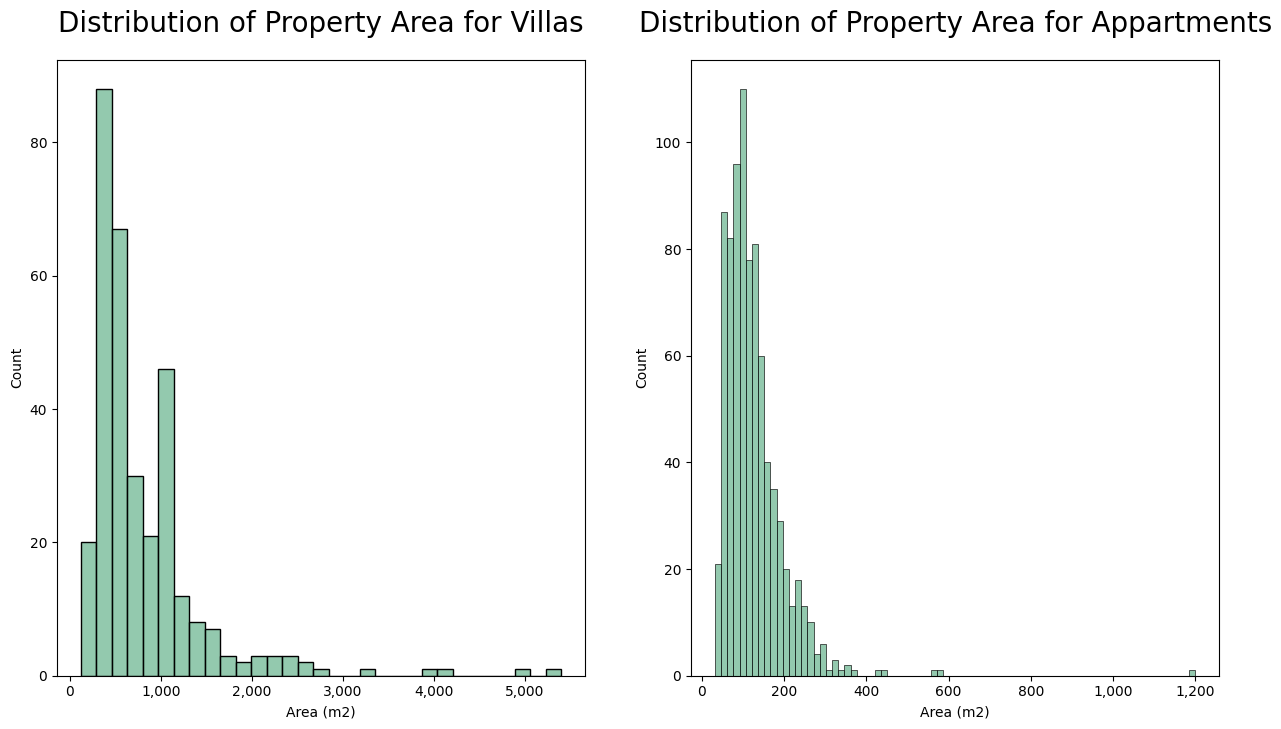

In [48]:

#Plot the distribution of Area
fig, ax = plt.subplots(1,2,figsize = (15,8))

g = sns.histplot(data = df[df.Type == 'Villas'], x = 'Area',color = cust_pal[5], ax = ax[0])
g.set_title('Distribution of Property Area for Villas',fontsize = 20, pad = 20)
g.set_xlabel('Area (m2)')
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))

g = sns.histplot(data = df[df.Type == 'Appartements'], x = 'Area',color = cust_pal[5], ax = ax[1])
g.set_title('Distribution of Property Area for Appartments',fontsize = 20, pad = 20)
g.set_xlabel('Area (m2)')
ax[1].xaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))

plt.show()

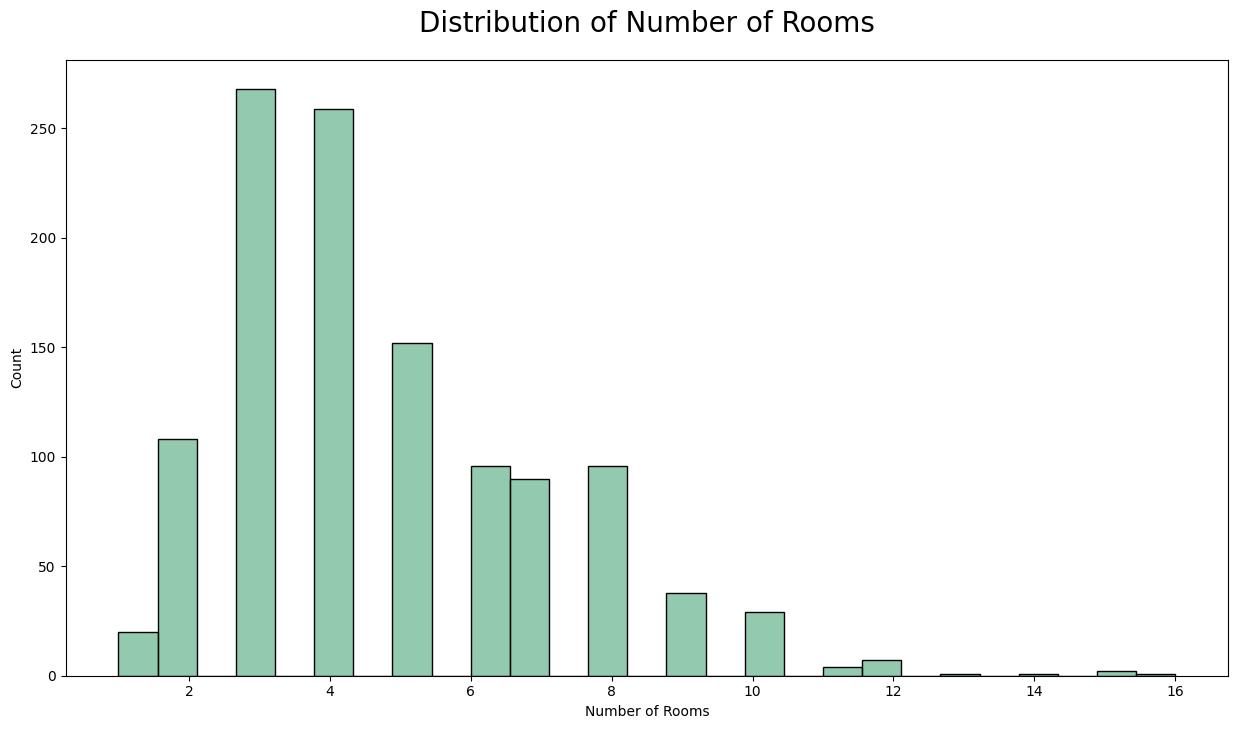

In [49]:

#Plot the distribution of rooms
fig, ax = plt.subplots(figsize = (15,8))

g = sns.histplot(data = df, x = 'Rooms',color = cust_pal[5], ax = ax)
g.set_title('Distribution of Number of Rooms',fontsize = 20, pad = 20)
g.set_xlabel('Number of Rooms')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))
plt.show()


In [50]:

#Number of listings by neighbourhood
neighbourhood_counts =df_exp['Localisation'].value_counts()
display(neighbourhood_counts)

Localisation
Californie             121
Racine                  62
Ain Diab                57
Maârif Extension        51
Bourgogne Ouest         48
Gauthier                45
Anfa                    43
Les princesses          39
Les Hôpitaux            39
Maârif                  38
                      ... 
Hay Lmkansa              1
Al Osra                  1
Hay Tarik                1
Hay Chrifa               1
Al Hadika                1
Hay Moulay Abdellah      1
Hay Albaraka             1
Hay Salama               1
Hay Arsalan              1
Al Hassania              1
Name: count, Length: 100, dtype: int64

C:\Users\R.BENZARIA\AppData\Local\Temp\ipykernel_36784\3825958398.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xs[0] = values[0]
C:\Users\R.BENZARIA\AppData\Local\Temp\ipykernel_36784\3825958398.py:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xs[i] = xs[i-1] + values[i]


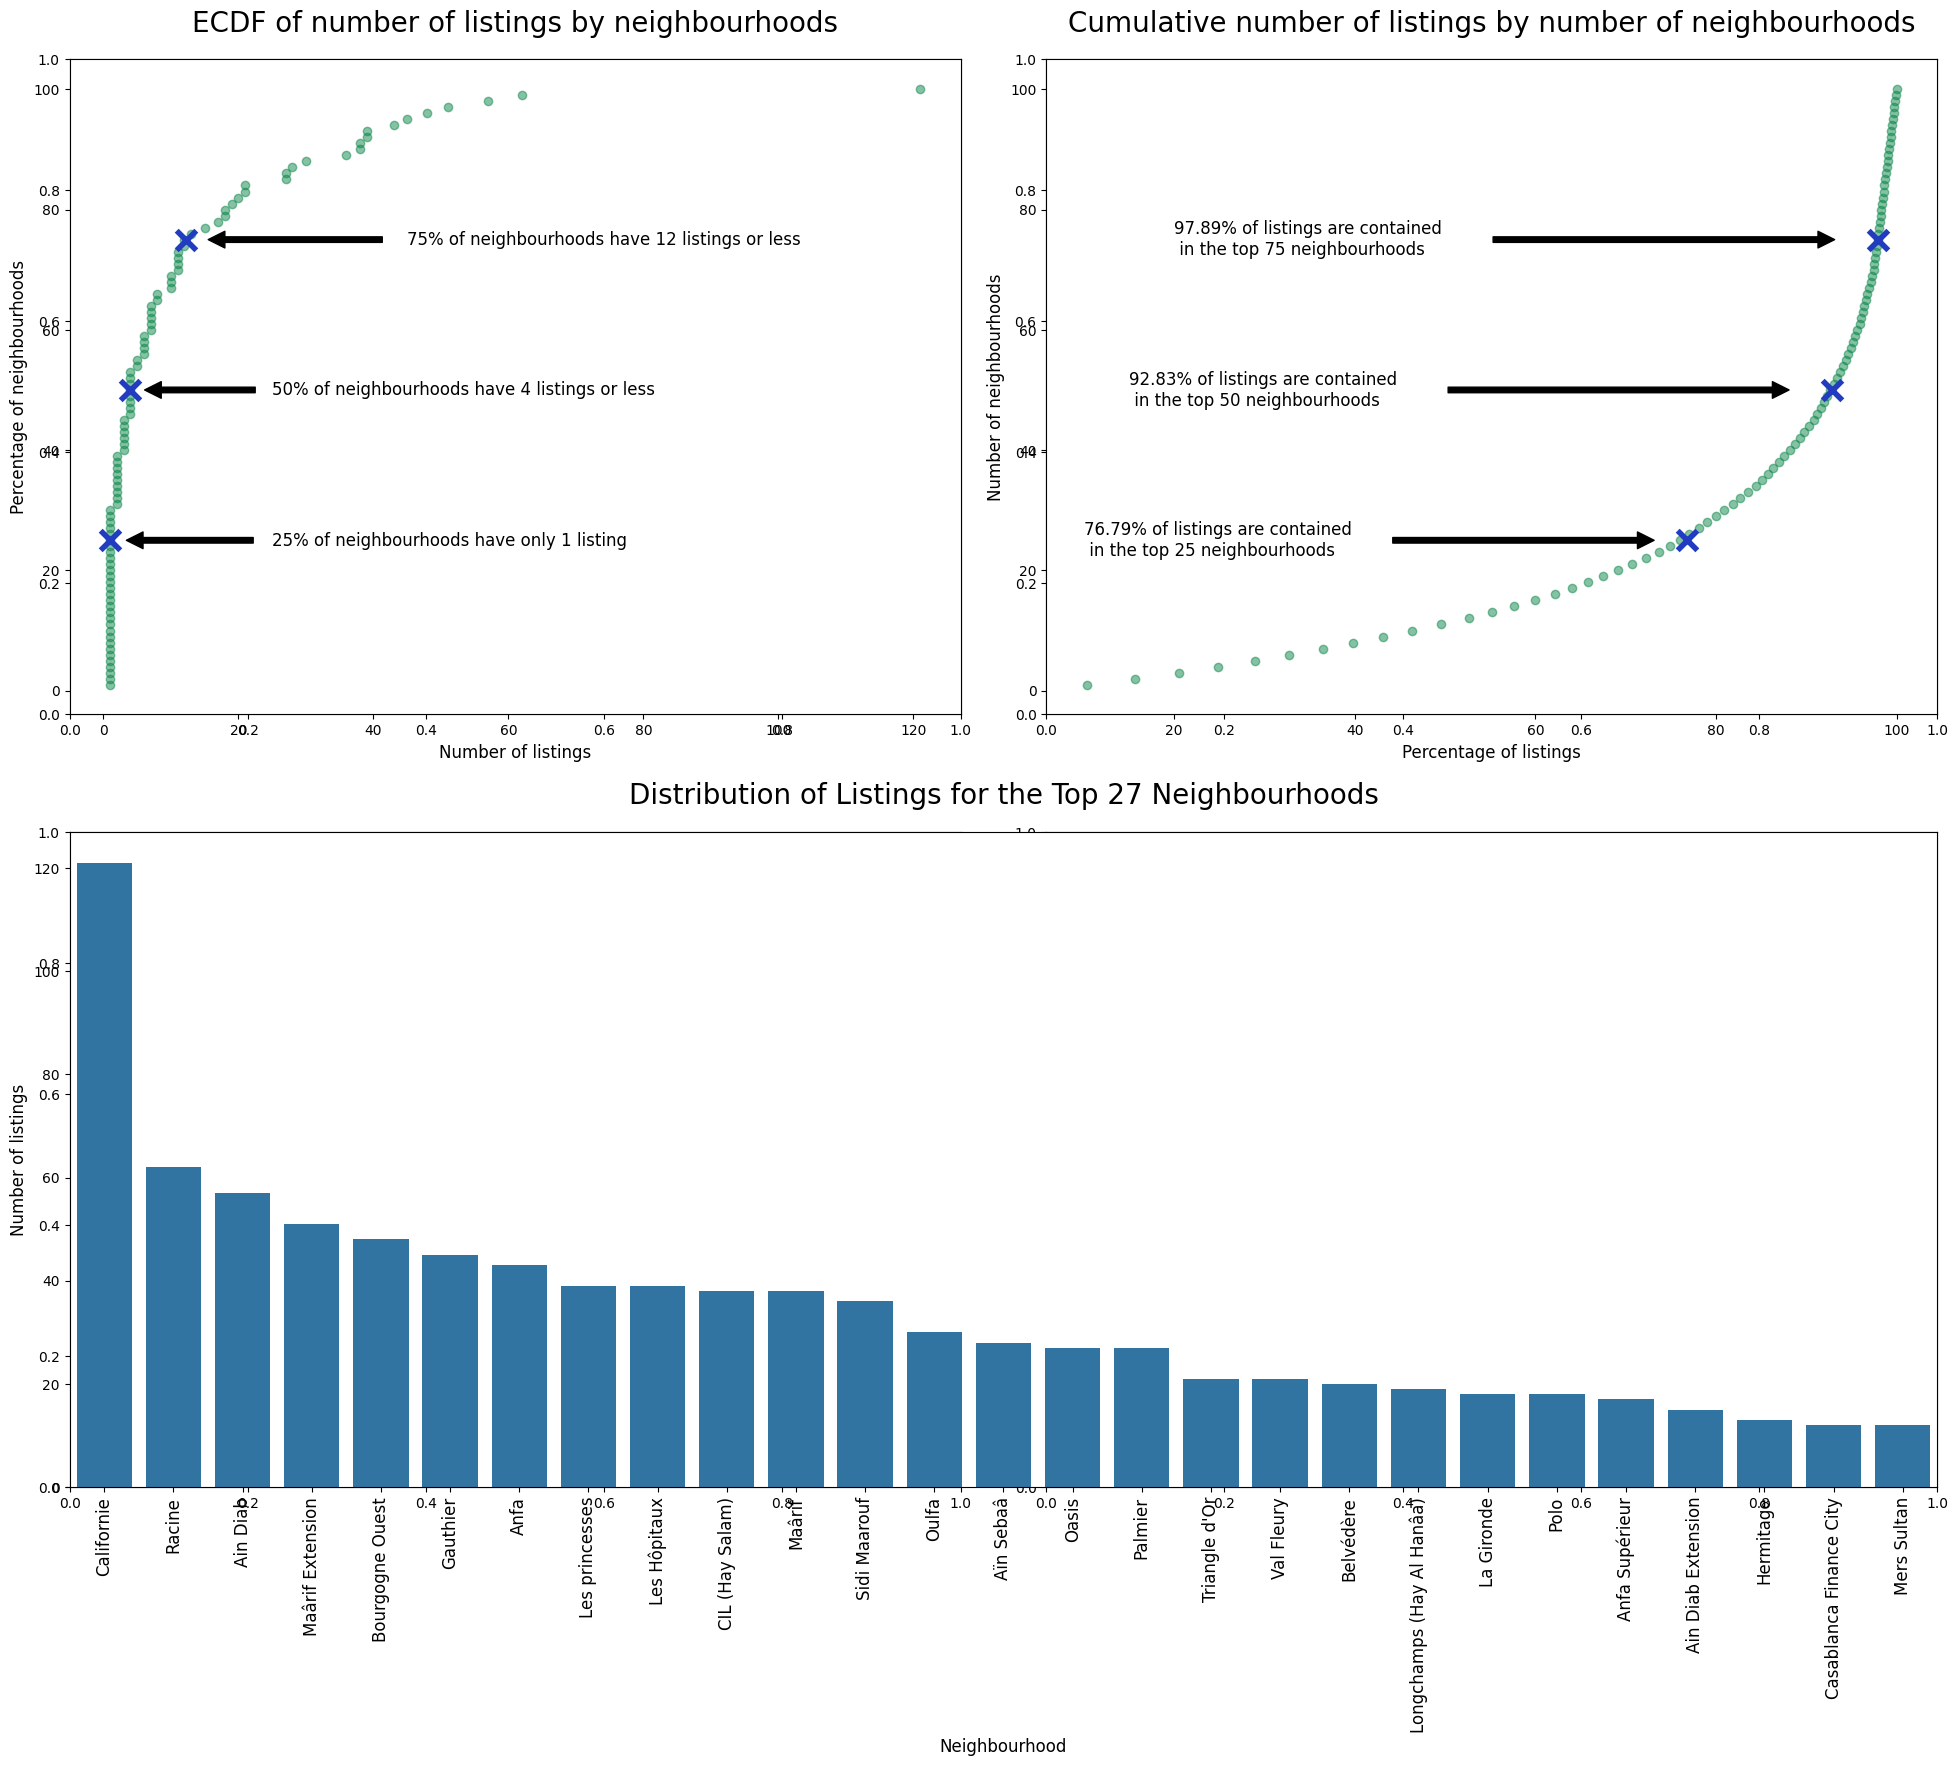

In [52]:
#Plot ECDF of the number of listings by neihbourhoods, cumulative number of listings in neighbourhood,
#and distribution of listings by neighbourhood

fig, axes = plt.subplots(2,2,figsize = (20,18))

ax1 = plt.subplot2grid((2,2),(0,0))
ax2 = plt.subplot2grid((2,2),(0,1))
ax3 = plt.subplot2grid((2,2),(1,0),colspan = 2)

#arange data
xs = neighbourhood_counts.sort_values()
ys = np.arange(1,len(xs)+1)/len(xs)*100

#compute percentiles of listings data
ptiles = [25,50,75]
ptiles_data = np.percentile(xs,ptiles)

#plot ecdf and 1st 2nd and 3rd quantiles
ax1.scatter(xs,ys,marker = 'o',alpha = 0.5,color = '#0d874b')
ax1.scatter(ptiles_data,ptiles,marker = 'x',color = '#213cc0',s = 200,linewidths=4)

#annotate the plot
ax1.annotate(f'{ptiles[0]}% of neighbourhoods have only {int(ptiles_data[0])} listing', 
             xy = (ptiles_data[0],ptiles[0]), 
             xytext = (25,ptiles[0]), 
             arrowprops=dict(facecolor='black', 
                             shrink=0.1), 
             verticalalignment='center', 
             fontsize = 12)
ax1.annotate(f'{ptiles[1]}% of neighbourhoods have {int(ptiles_data[1])} listings or less', 
             xy = (ptiles_data[1],ptiles[1]), 
             xytext = (25,ptiles[1]), 
             arrowprops=dict(facecolor='black', 
                             shrink=0.1), 
             verticalalignment='center',
             fontsize = 12)
ax1.annotate(f'{ptiles[2]}% of neighbourhoods have {int(ptiles_data[2])} listings or less', 
             xy = (ptiles_data[2],ptiles[2]), 
             xytext = (45,ptiles[2]), 
             arrowprops=dict(facecolor='black', 
                             shrink=0.1), 
             verticalalignment='center',
             fontsize = 12)

ax1.set_ylabel('Percentage of neighbourhoods',fontsize = 12)
ax1.set_xlabel('Number of listings',fontsize = 12)
ax1.set_title('ECDF of number of listings by neighbourhoods',fontsize = 20,pad = 20)


#Plot cumulative number of listings by neighbourhoods
values = neighbourhood_counts.sort_values(ascending = False)
xs = np.zeros(len(values))
xs[0] = values[0]
for i in range(1,len(values)):
    xs[i] = xs[i-1] + values[i]
xs = xs/values.sum()*100
ys = np.arange(1,len(xs)+1)#/len(xs)*100

ptiles = [25,50,75]
ptiles_ydata = [int(x) for x in np.percentile(np.arange(1,len(xs)+1),[25,50,75])]
ptiles_data = np.percentile(xs,ptiles)

ax2.scatter(xs,ys,marker = 'o',alpha = 0.5,color = '#0d874b')
ax2.scatter(ptiles_data,ptiles_ydata,marker = 'x',color = '#213cc0',s = 200,linewidths=4)

#annotate the plot
ax2.annotate(f'{ptiles_data[0]:.2f}% of listings are contained \n in the top {ptiles_ydata[0]} neighbourhoods', 
             xy = (ptiles_data[0],ptiles_ydata[0]), 
             xytext = (10,ptiles_ydata[0]), 
             arrowprops=dict(facecolor='black', 
                             shrink=0.1), 
             verticalalignment='center', 
             fontsize = 12)
ax2.annotate(f'{ptiles_data[1]:.2f}% of listings are contained \n in the top {ptiles_ydata[1]} neighbourhoods', 
             xy = (ptiles_data[1],ptiles_ydata[1]), 
             xytext = (15,ptiles_ydata[1]), 
             arrowprops=dict(facecolor='black', 
                             shrink=0.1), 
             verticalalignment='center',
             fontsize = 12)
ax2.annotate(f'{ptiles_data[2]:.2f}% of listings are contained \n in the top {ptiles_ydata[2]} neighbourhoods', 
             xy = (ptiles_data[2],ptiles_ydata[2]), 
             xytext = (20,ptiles_ydata[2]), 
             arrowprops=dict(facecolor='black', 
                             shrink=0.1), 
             verticalalignment='center',
             fontsize = 12)

ax2.set_ylabel('Number of neighbourhoods',fontsize = 12)
ax2.set_xlabel('Percentage of listings',fontsize = 12)
ax2.set_title('Cumulative number of listings by number of neighbourhoods',fontsize = 20,pad = 20)


#Plot the distribution of listings by neighbourhood

data = df_exp[df_exp['Localisation'].isin(neighbourhood_counts[:27].index)]
ax3 = sns.countplot(x= 'Localisation' , data = data, order = data.value_counts('Localisation').index)
ax3.set_ylabel('Number of listings',fontsize = 12)
ax3.set_xlabel('Neighbourhood',fontsize = 12)
ax3.set_title('Distribution of Listings for the Top 27 Neighbourhoods',fontsize = 20,pad = 20)
plt.xticks(rotation = 90,fontsize = 12)

plt.tight_layout()
#plt.savefig('/Users/Ilyas/Documents/GitHub/Casablanca-House-Prices/EDA_visuals/Distribution_Listings_by_Neighbourhood.png')
plt.show()


In [53]:

#Keep only the data from the top 27 neighbourhoods by number of listings
neighbourhoods_kept = neighbourhood_counts[:27].index
df_20_plus = df_exp[df_exp['Localisation'].isin(neighbourhoods_kept)]


In [54]:

#Describe the price variable
df_20_plus['Price_m2'].describe()

count       915.000000
mean      16287.300780
std        7378.169099
min          50.000000
25%       12838.342997
50%       15680.000000
75%       18598.558346
max      110810.810811
Name: Price_m2, dtype: float64

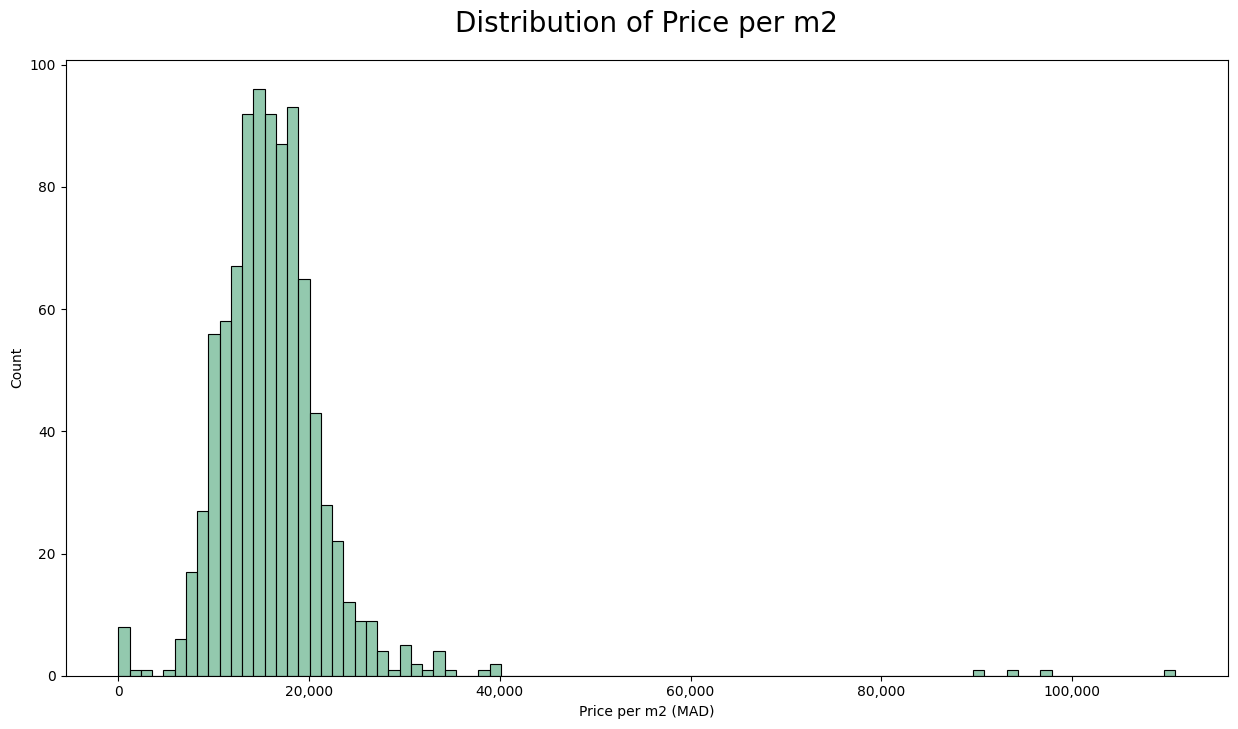

In [55]:
#Plot the distribution of price per m2
fig, ax = plt.subplots(figsize = (15,8))

g = sns.histplot(data = df_20_plus, x = 'Price_m2',color = cust_pal[5], ax = ax)
g.set_title('Distribution of Price per m2',fontsize = 20, pad = 20)
g.set_xlabel('Price per m2 (MAD)')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))

#plt.savefig('/Users/Ilyas/Documents/GitHub/Casablanca-House-Prices/EDA_visuals/Distribution_Price_m2.png')
plt.show()

In [56]:


#display the potential outlier listings in dataframe
display(df_20_plus.sort_values(['Price_m2']).head(20))
display(df_20_plus.sort_values(['Price_m2']).tail(20))


,Type,Localisation,Price,Area,Rooms,Bedrooms,Bathrooms,Floor,Other_tags,Price_m2,Current_state,Age
1165,Appartements,Palmier,14200,284.0,7.0,5.0,3.0,2.0,"[Bon état, 10-20 ans]",50.000000,Bon état,10-20 ans
1034,Appartements,Val Fleury,7000,124.0,4.0,3.0,2.0,3.0,"[Bon état, 10-20 ans]",56.451613,Bon état,10-20 ans
794,Villas,Ain Diab,45000,667.0,5.0,4.0,3.0,0.0,[],67.466267,NaN,NaN
244,Appartements,Gauthier,9500,140.0,4.0,3.0,2.0,4.0,"[Nouveau, 1-5 ans]",67.857143,Nouveau,1-5 ans
673,Appartements,Les princesses,8000,95.0,3.0,2.0,2.0,4.0,"[Nouveau, 5-10 ans]",84.210526,Nouveau,5-10 ans
250,Villas,Ain Diab,38000,445.0,8.0,4.0,4.0,0.0,[Bon état],85.393258,Bon état,NaN
0,Appartements,Casablanca Finance City,22000,219.0,4.0,3.0,3.0,11.0,"[Nouveau, Moins d'un an]",100.456621,Nouveau,Moins d'un an
966,Appartements,Palmier,17000,143.0,4.0,3.0,3.0,2.0,"[Nouveau, 5-10 ans]",118.881119,Nouveau,5-10 ans
173,Appartements,Racine,450000,248.0,6.0,4.0,3.0,2.0,"[Bon état, 10-20 ans]",1814.516129,Bon état,10-20 ans
712,Appartements,Mers Sultan,250000,100.0,2.0,1.0,2.0,5.0,[Bon état],2500.000000,Bon état,NaN


,Type,Localisation,Price,Area,Rooms,Bedrooms,Bathrooms,Floor,Other_tags,Price_m2,Current_state,Age
941,Villas,Anfa Supérieur,24000000,805.0,6.0,4.0,3.0,0.0,"[Bon état, 5-10 ans]",29813.664596,Bon état,5-10 ans
210,Appartements,Anfa,5590000,186.0,3.0,2.0,2.0,12.0,[Bon état],30053.763441,Bon état,NaN
978,Appartements,Casablanca Finance City,6200000,206.0,10.0,3.0,3.0,8.0,"[Nouveau, 1-5 ans]",30097.087379,Nouveau,1-5 ans
1110,Villas,Oulfa,2500000,83.0,7.0,3.0,4.0,0.0,"[Bon état, 5-10 ans]",30120.481928,Bon état,5-10 ans
1102,Villas,Longchamps (Hay Al Hanâa),16000000,525.0,7.0,4.0,6.0,0.0,"[Nouveau, Moins d'un an]",30476.190476,Nouveau,Moins d'un an
504,Villas,Gauthier,4800000,152.0,6.0,3.0,2.0,0.0,[Bon état],31578.947368,Bon état,NaN
481,Villas,Ain Diab,16500000,520.0,3.0,4.0,2.0,0.0,"[À rénover, 20-30 ans]",31730.769231,À rénover,20-30 ans
491,Villas,Anfa Supérieur,25000000,781.0,9.0,4.0,4.0,0.0,"[Nouveau, 1-5 ans]",32010.243278,Nouveau,1-5 ans
592,Appartements,Casablanca Finance City,1500000,45.0,2.0,1.0,2.0,2.0,"[Nouveau, 1-5 ans]",33333.333333,Nouveau,1-5 ans
723,Appartements,Gauthier,1717500,51.0,2.0,1.0,2.0,3.0,[Nouveau],33676.470588,Nouveau,NaN


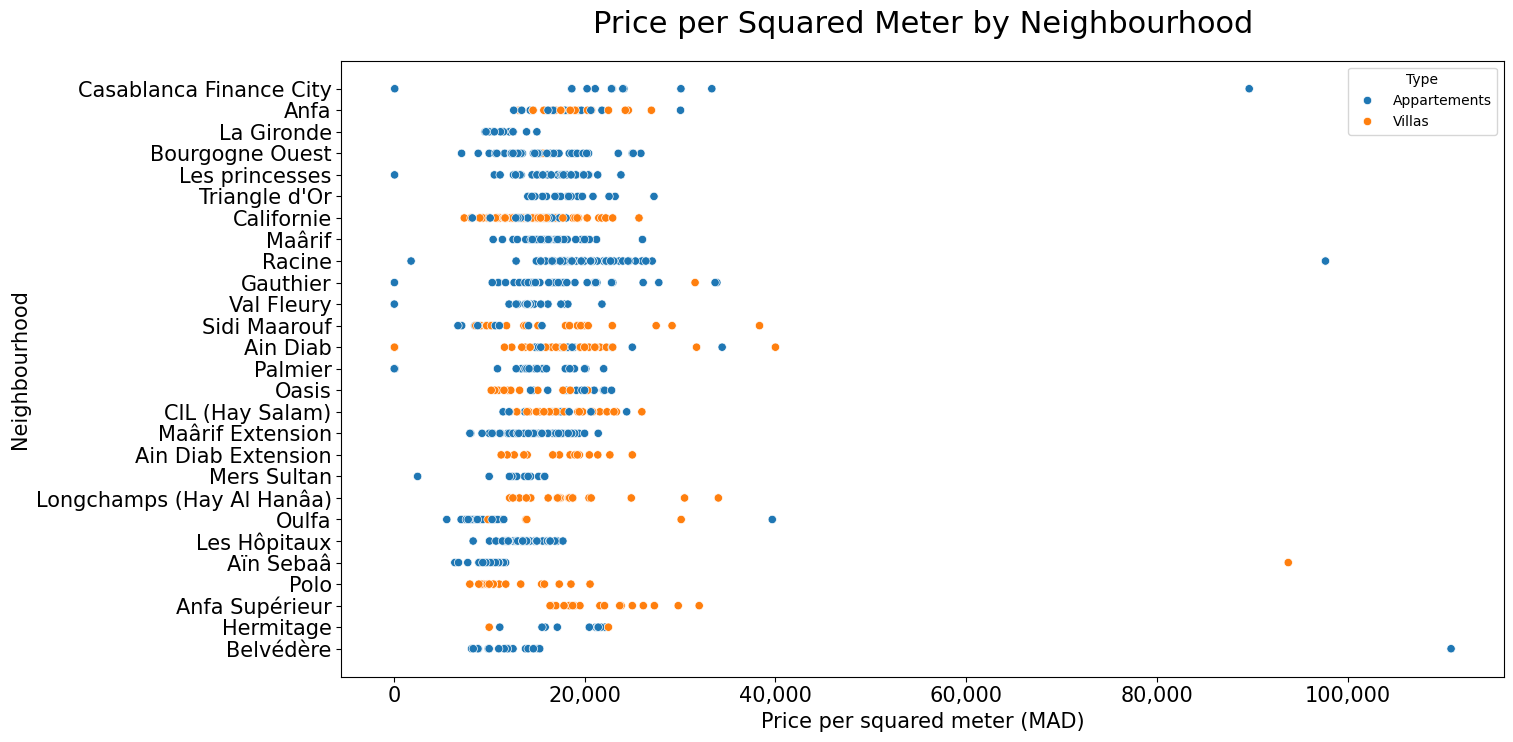

In [ ]:

#Visualize the prices per m2 by neighbourhood and by type

fig,ax = plt.subplots(figsize = (15,8))
ax = sns.scatterplot(data = df_20_plus,y='Localisation',x='Price_m2',hue = 'Type')
ax.set_ylabel('Neighbourhood',fontsize = 15)
ax.set_xlabel('Price per squared meter (MAD)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))
ax.set_title('Price per Squared Meter by Neighbourhood',pad = 20,fontsize = 22)

plt.tight_layout()
#plt.savefig('/Users/Ilyas/Documents/GitHub/Casablanca-House-Prices/EDA_visuals/Distribution_Price_m2_by_neighbourhood.png')
plt.show()

In [60]:
df_20_plus = df_20_plus[df_20_plus.Price_m2 > 3000].reset_index(drop = True)

In [61]:
#Select indices of potential ouliers
quartiers = df_20_plus.Localisation.unique()
types = df_20_plus.Type.unique()
z_pos_thresh = 3

id_drop = []

#get indices with z scores computed on price_m2 larger than the threshold
for qrt in quartiers:
    df_nei = df_20_plus[(df_20_plus.Localisation == qrt)]
    outliers = df_nei[np.abs(stats.zscore(df_nei['Price_m2'])>z_pos_thresh)]
    id_drop.append([item for item in outliers.index])

id_drop = [item for elem in id_drop for item in elem]
print( f'{len(id_drop)} outliers have been spotted')


11 outliers have been spotted


C:\Users\R.BENZARIA\AppData\Local\Temp\ipykernel_36784\1758144726.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g2 = sns.scatterplot(data = df_20_plus.loc[id_drop],


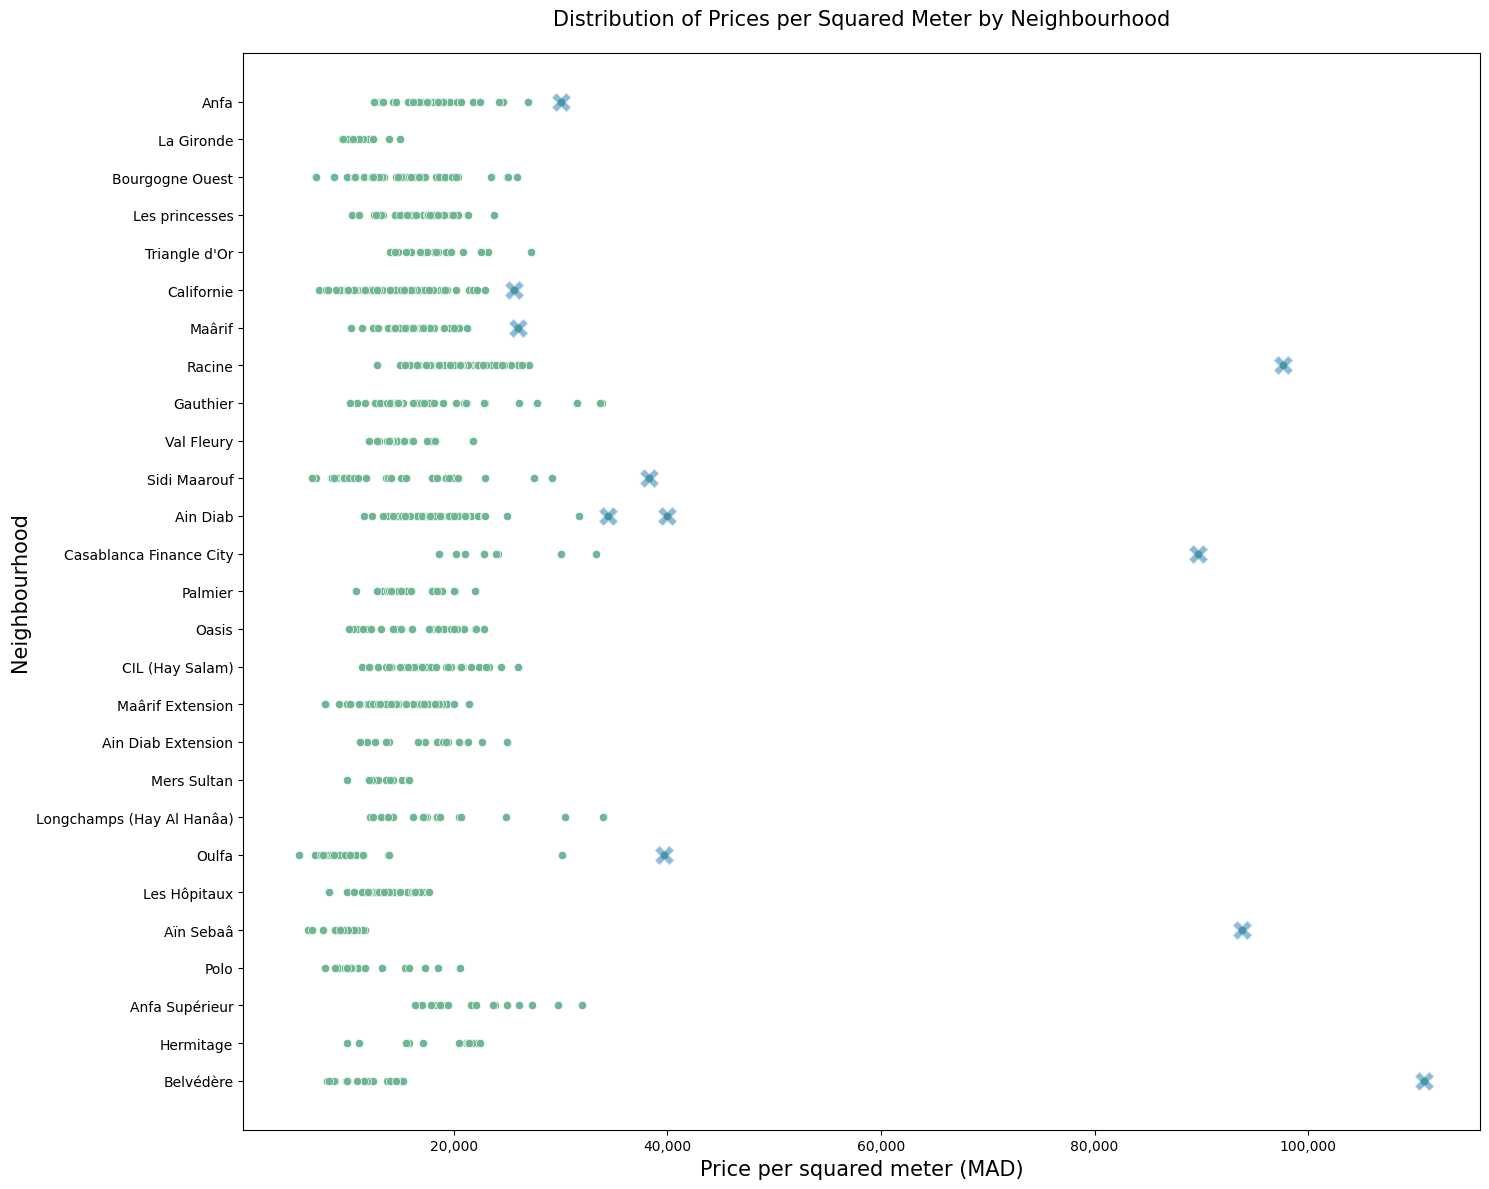

In [63]:
#Visualize the listings price_m2 by neighbourhoods and selected outliers

fig, ax = plt.subplots(figsize = (15,12))
g1 = sns.scatterplot(data = df_20_plus,
                     y='Localisation',
                     x='Price_m2',
                     ax = ax,
                     color = cust_pal[5])

g2 = sns.scatterplot(data = df_20_plus.loc[id_drop],
                     y='Localisation',
                     x='Price_m2',
                     alpha = 0.5,
                     marker = 'X',
                     palette='brg',
                     s= 200,
                     ax =ax)

_ = plt.ylabel('Neighbourhood',fontdict = {'fontsize':15})
_ = plt.xlabel('Price per squared meter (MAD)', fontdict = {'fontsize':15})
_ = plt.title('Distribution of Prices per Squared Meter by Neighbourhood',pad = 20,fontdict = {'fontsize':15})
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))

plt.tight_layout()
#plt.savefig('/Users/Ilyas/Documents/GitHub/Casablanca-House-Prices/EDA_visuals/Distribution_Price_m2_by_neighbourhood_wt_outliers.png')
plt.show()


In [64]:

#Drop outliers
df_outli = df_20_plus.drop(id_drop).reset_index(drop = True)

In [65]:
#Select indices of potential ouliers
quartiers = df_20_plus.Localisation.unique()
types = df_20_plus.Type.unique()
z_pos_thresh = 3
id_drop_2 = []

#get indices with z scores computed on price_m2 larger than the threshold
for qrt in quartiers:
    df_nei = df_outli[(df_outli.Localisation == qrt)]
    outliers = df_nei[np.abs(stats.zscore(df_nei['Price_m2'])>z_pos_thresh)]
    id_drop_2.append([item for item in outliers.index])

id_drop_2 = [item for elem in id_drop_2 for item in elem]
print( f'{len(id_drop_2)} outliers have been spotted')

2 outliers have been spotted


C:\Users\R.BENZARIA\AppData\Local\Temp\ipykernel_36784\921869001.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g2 = sns.scatterplot(data = df_outli.loc[id_drop_2],


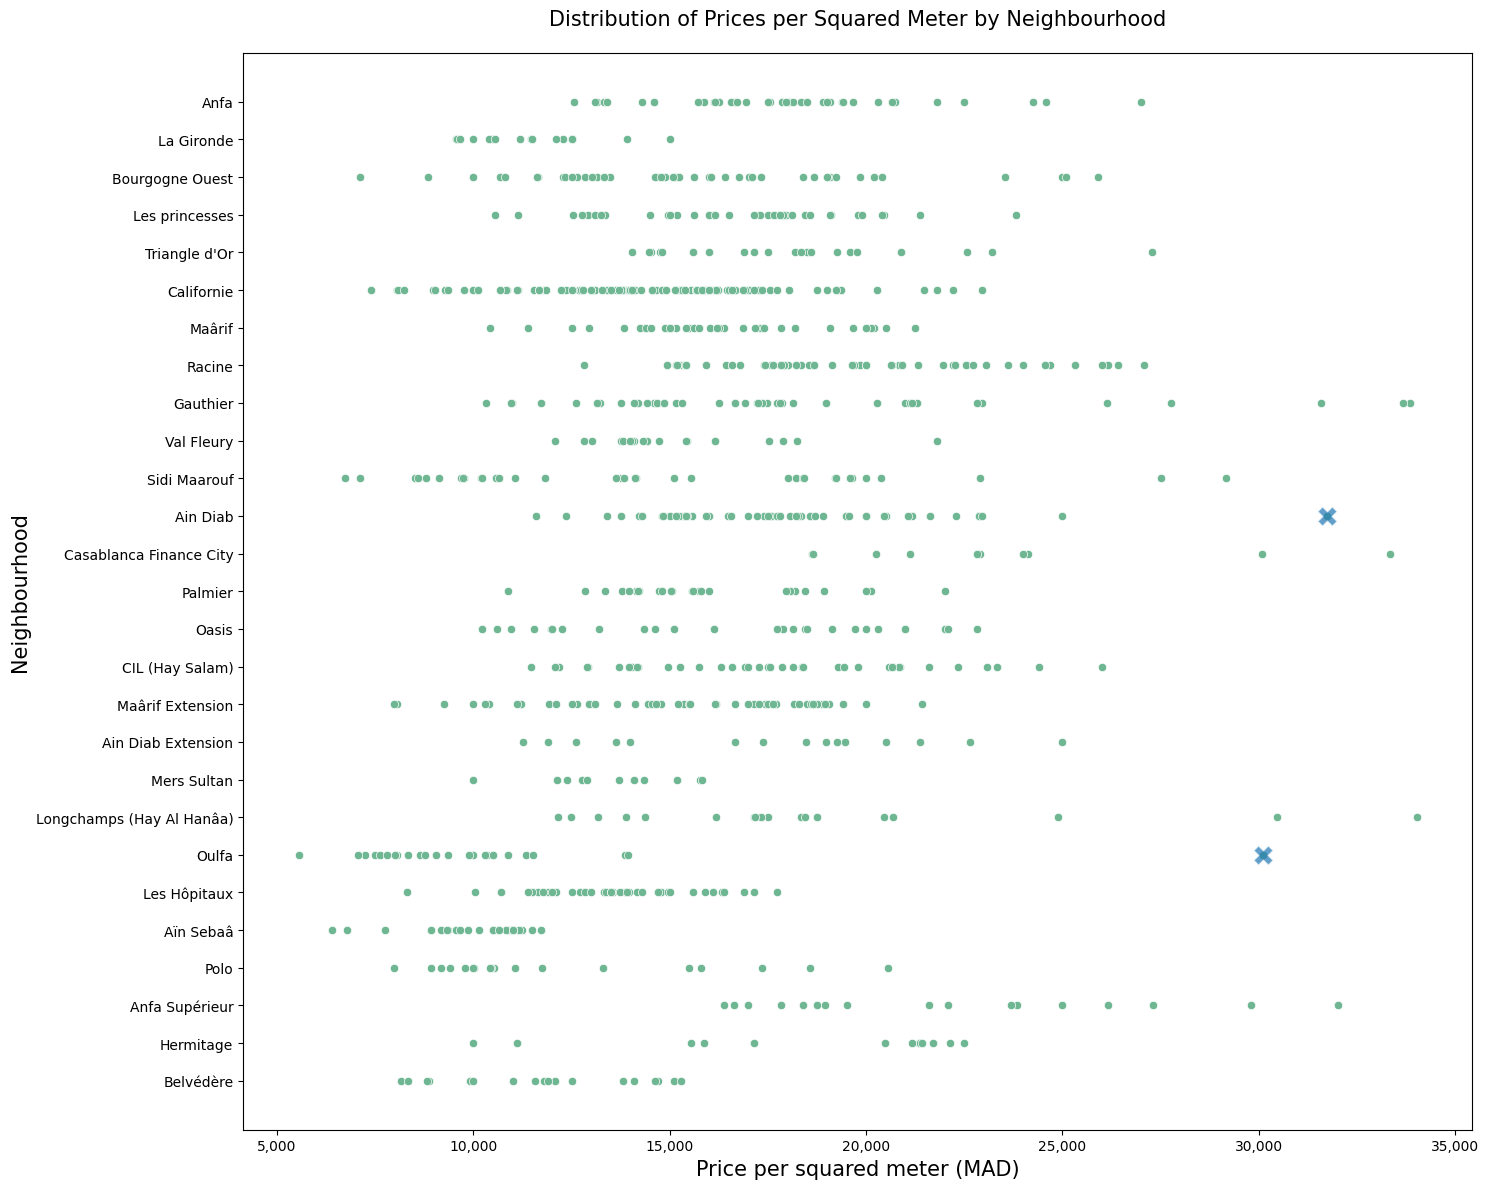

In [67]:

#Visualize the listings price_m2 by neighbourhoods and selected outliers
fig, ax = plt.subplots(figsize = (15,12))
g1 = sns.scatterplot(data = df_outli,
                     y='Localisation',
                     x='Price_m2',
                     ax = ax,
                     color = cust_pal[5])
g2 = sns.scatterplot(data = df_outli.loc[id_drop_2],
                     y='Localisation',
                     x='Price_m2',
                     marker = 'X',
                     alpha = 0.7,
                     palette='brg',
                     s= 200,
                     ax =ax)

_ = plt.ylabel('Neighbourhood',fontdict = {'fontsize':15})
_ = plt.xlabel('Price per squared meter (MAD)', fontdict = {'fontsize':15})
_ = plt.title('Distribution of Prices per Squared Meter by Neighbourhood',pad = 20,fontdict = {'fontsize':15})
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))

plt.tight_layout()
#plt.savefig('/Users/Ilyas/Documents/GitHub/Casablanca-House-Prices/EDA_visuals/Distribution_Price_m2_by_neighbourhood_wt_outliers2.png')
plt.show()


In [68]:

#Drop outliers
df_clean = df_outli.drop(id_drop_2).reset_index(drop = True)

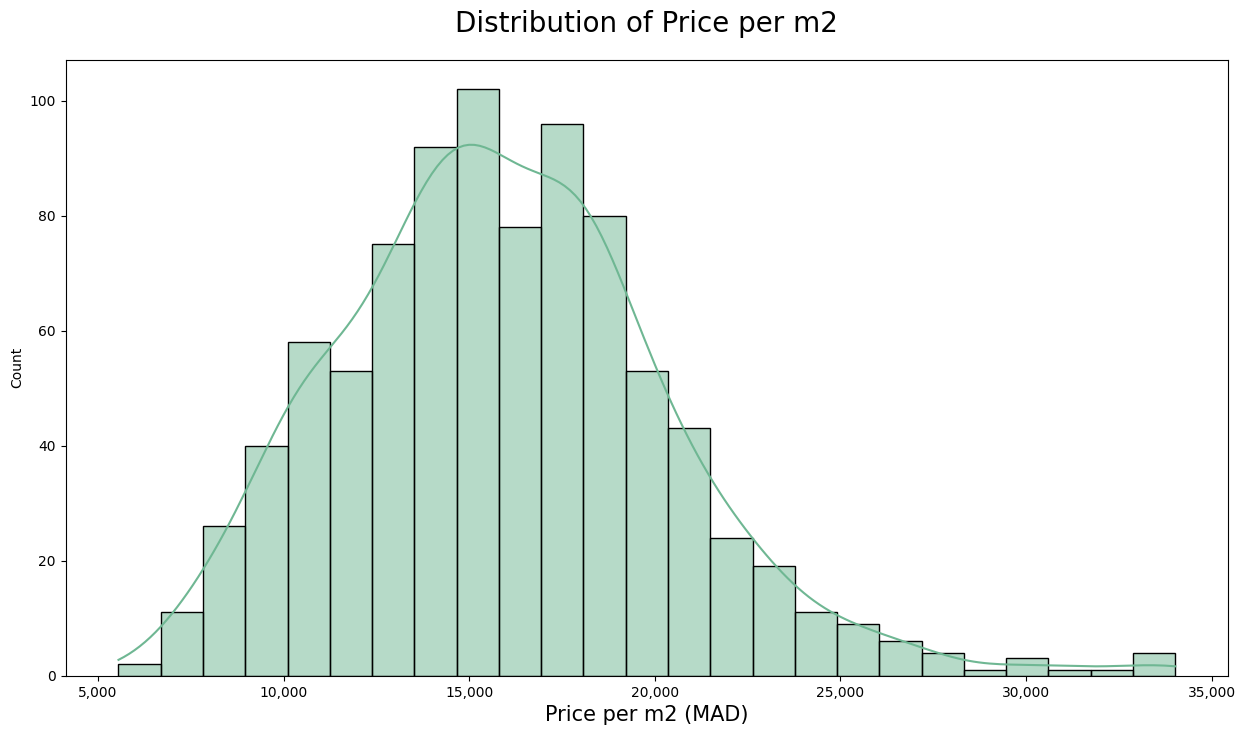

In [70]:
#Distribution of price per m2 after cleaning outliers
#Plot the distribution of price per m2
fig, ax = plt.subplots(figsize = (15,8))

g = sns.histplot(data = df_clean, x = 'Price_m2',color = cust_pal[5], ax = ax,kde = True)
g.set_title('Distribution of Price per m2',fontsize = 20, pad = 20)
g.set_xlabel('Price per m2 (MAD)',fontsize = 15)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))

#plt.savefig('/Users/Ilyas/Documents/GitHub/Casablanca-House-Prices/EDA_visuals/Distribution_Price_m2_no_outliers.png')
plt.show()


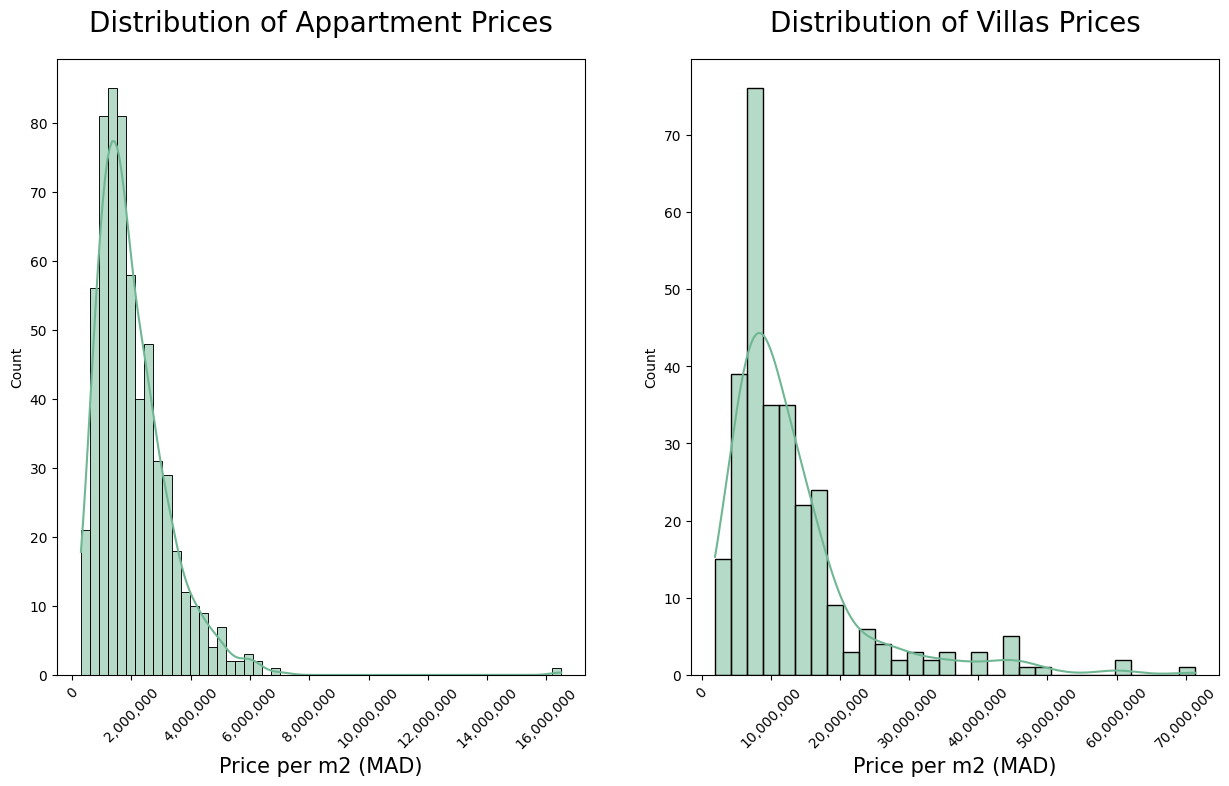

In [72]:
#Distribution of price per m2 after cleaning outliers
#Plot the distribution of price per m2
fig, ax = plt.subplots(1,2,figsize = (15,8))

g = sns.histplot(data = df_clean[df_clean.Type == 'Appartements'], x = 'Price',color = cust_pal[5], ax = ax[0],kde = True)
ax[0].set_title('Distribution of Appartment Prices',fontsize = 20, pad = 20)
ax[0].set_xlabel('Price per m2 (MAD)',fontsize = 15)
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))
ax[0].tick_params('x',rotation = 45)

g = sns.histplot(data = df_clean[df_clean.Type == 'Villas'], x = 'Price',color = cust_pal[5], ax = ax[1],kde = True)
ax[1].set_title('Distribution of Villas Prices',fontsize = 20, pad = 20)
ax[1].set_xlabel('Price per m2 (MAD)',fontsize = 15)
ax[1].xaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))
ax[1].tick_params('x',rotation = 45)

#plt.savefig('/Users/Ilyas/Documents/GitHub/Casablanca-House-Prices/EDA_visuals/Distribution_Price_no_outliers.png')
plt.show()


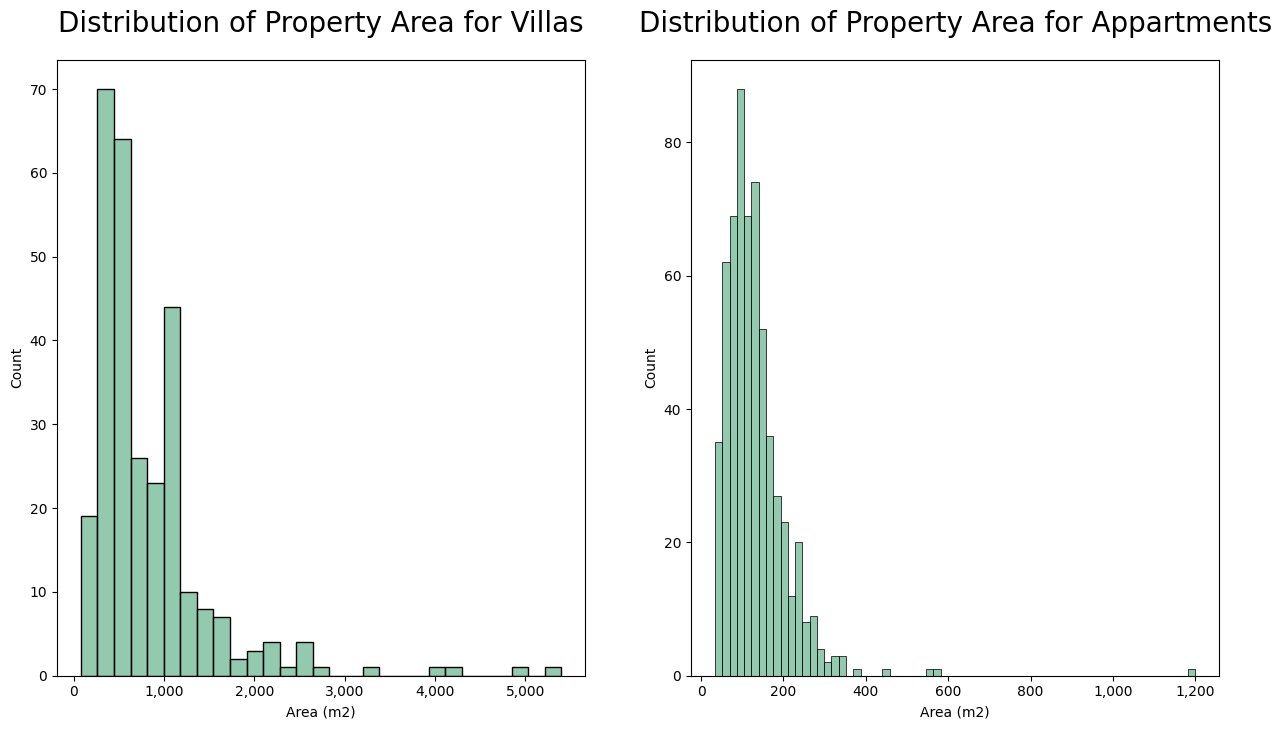

In [73]:
#Plot the distribution of Area
fig, ax = plt.subplots(1,2,figsize = (15,8))

g = sns.histplot(data = df_clean[df_clean.Type == 'Villas'], x = 'Area',color = cust_pal[5], ax = ax[0])
g.set_title('Distribution of Property Area for Villas',fontsize = 20, pad = 20)
g.set_xlabel('Area (m2)')
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))

g = sns.histplot(data = df_clean[df_clean.Type == 'Appartements'], x = 'Area',color = cust_pal[5], ax = ax[1])
g.set_title('Distribution of Property Area for Appartments',fontsize = 20, pad = 20)
g.set_xlabel('Area (m2)')
ax[1].xaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))

plt.show()

C:\Users\R.BENZARIA\AppData\Local\Temp\ipykernel_36784\3192802185.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=df_clean[df_clean.Type == 'Villas'].Localisation,
C:\Users\R.BENZARIA\AppData\Local\Temp\ipykernel_36784\3192802185.py:7: UserWarning: 
The palette list has fewer values (1) than needed (16) and will cycle, which may produce an uninterpretable plot.
  g = sns.barplot(x=df_clean[df_clean.Type == 'Villas'].Localisation,
C:\Users\R.BENZARIA\AppData\Local\Temp\ipykernel_36784\3192802185.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=df_clean[df_clean.Type == 'Appartements'].Localisation,
C:\Users\R.BENZARIA\AppData\Local\Temp\ipykernel_36784\3192802185.py:19: 

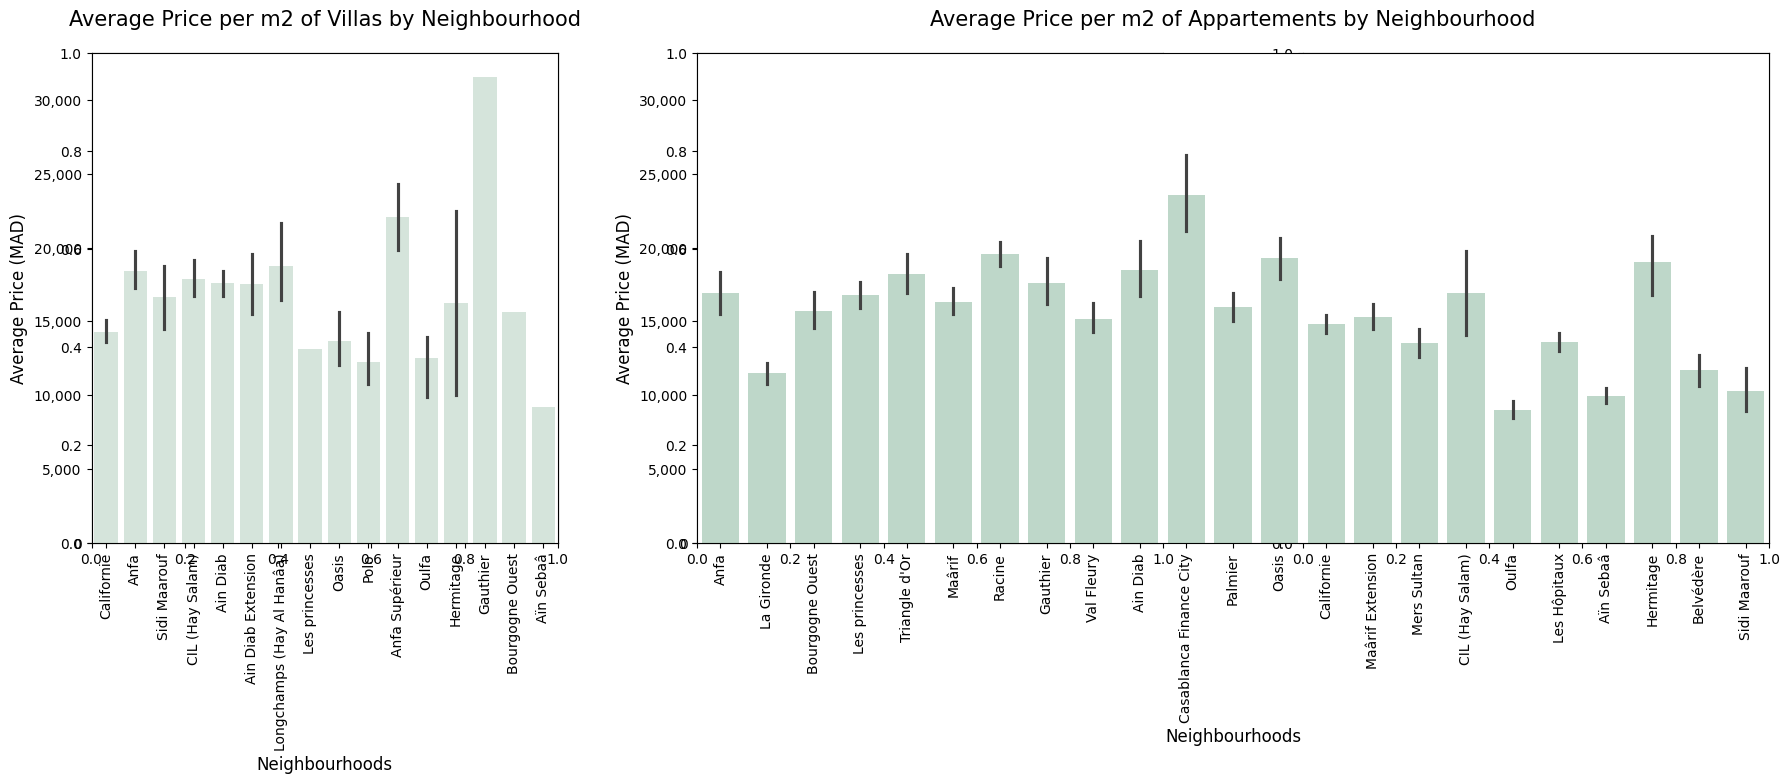

In [76]:
#Visualize the average price per m2 by neighbourhood and by type

fig, ax = plt.subplots(1,3,figsize = (18,8))
ax[0] = plt.subplot2grid((1,3),(0,0),colspan = 1)
ax[1] = plt.subplot2grid((1,3),(0,1),colspan = 2)

g = sns.barplot(x=df_clean[df_clean.Type == 'Villas'].Localisation,
                y=df_clean[df_clean.Type == 'Villas'].Price_m2,
                palette = [cust_pal[1]],
                #order = df_clean[df_clean.Type == 'Villas'].groupby('Localisation').mean()['Price_m2'].sort_values(ascending = False).index,
                ax = ax[0])
ax[0].set_title('Average Price per m2 of Villas by Neighbourhood',fontsize = 15,pad=20)
ax[0].set_ylabel('Average Price (MAD)',fontsize = 12)
ax[0].set_xlabel('Neighbourhoods',fontsize = 12)
ax[0].yaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))
ax[0].tick_params('x',rotation = 90)


g = sns.barplot(x=df_clean[df_clean.Type == 'Appartements'].Localisation,
                y=df_clean[df_clean.Type == 'Appartements'].Price_m2,
                palette = [cust_pal[2]],
                #order = df_clean[df_clean.Type == 'Appartements'].groupby('Localisation').mean()['Price_m2'].sort_values(ascending = False).index,
                ax = ax[1])
ax[1].sharey(ax[0])
ax[1].set_title('Average Price per m2 of Appartements by Neighbourhood',fontsize = 15,pad=20)
ax[1].set_ylabel('Average Price (MAD)',fontsize = 12)
ax[1].set_xlabel('Neighbourhoods',fontsize = 12)
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))
ax[1].tick_params('x',rotation = 90)

plt.tight_layout()
plt.show()

C:\Users\R.BENZARIA\AppData\Local\Temp\ipykernel_36784\3130538181.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=df_clean[df_clean.Type == 'Villas'].Localisation,
C:\Users\R.BENZARIA\AppData\Local\Temp\ipykernel_36784\3130538181.py:7: UserWarning: 
The palette list has fewer values (1) than needed (16) and will cycle, which may produce an uninterpretable plot.
  g = sns.barplot(x=df_clean[df_clean.Type == 'Villas'].Localisation,
C:\Users\R.BENZARIA\AppData\Local\Temp\ipykernel_36784\3130538181.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=df_clean[df_clean.Type == 'Appartements'].Localisation,
C:\Users\R.BENZARIA\AppData\Local\Temp\ipykernel_36784\3130538181.py:19: 

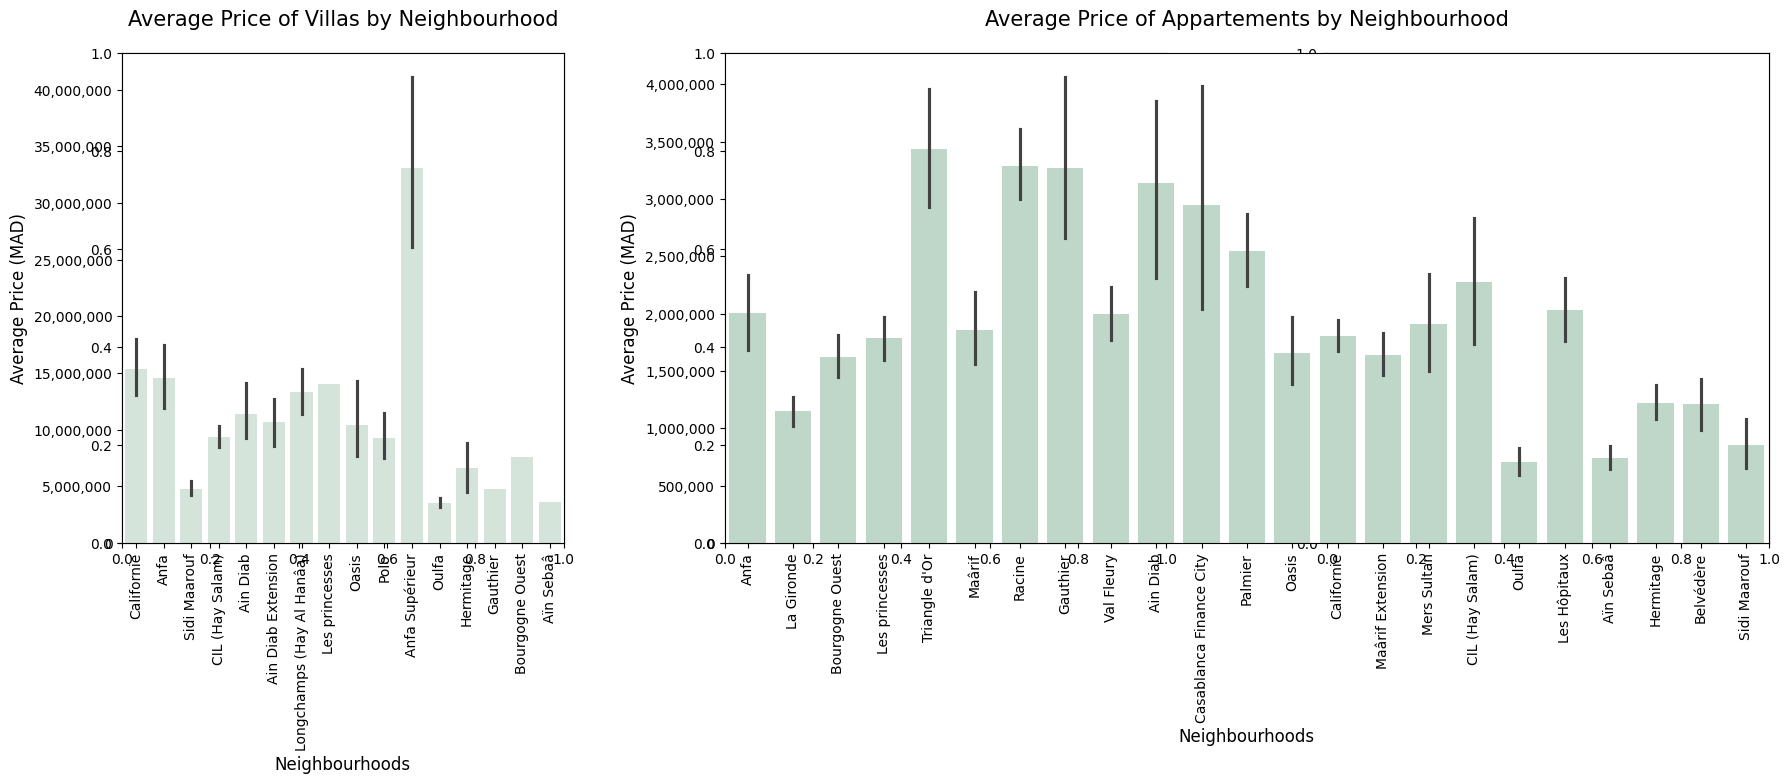

In [79]:
#Visualize the average price by neighbourhood and by type

fig, ax = plt.subplots(1,3,figsize = (18,8))
ax[0] = plt.subplot2grid((1,3),(0,0),colspan = 1)
ax[1] = plt.subplot2grid((1,3),(0,1),colspan = 2)

g = sns.barplot(x=df_clean[df_clean.Type == 'Villas'].Localisation,
                y=df_clean[df_clean.Type == 'Villas'].Price,
                palette = [cust_pal[1]],
                #order = df_clean[df_clean.Type == 'Villas'].groupby('Localisation').mean()['Price'].sort_values(ascending = False).index,
                ax = ax[0])
ax[0].set_title('Average Price of Villas by Neighbourhood',fontsize = 15,pad=20)
ax[0].set_ylabel('Average Price (MAD)',fontsize = 12)
ax[0].set_xlabel('Neighbourhoods',fontsize = 12)
ax[0].yaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))
ax[0].tick_params('x',rotation = 90)


g = sns.barplot(x=df_clean[df_clean.Type == 'Appartements'].Localisation,
                y=df_clean[df_clean.Type == 'Appartements'].Price,
                palette = [cust_pal[2]],
                #order = df_clean[df_clean.Type == 'Appartements'].groupby('Localisation').mean()['Price'].sort_values(ascending = False).index,
                ax = ax[1])
#ax[1].sharey(ax[0])
ax[1].set_title('Average Price of Appartements by Neighbourhood',fontsize = 15,pad=20)
ax[1].set_ylabel('Average Price (MAD)',fontsize = 12)
ax[1].set_xlabel('Neighbourhoods',fontsize = 12)
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))
ax[1].tick_params('x',rotation = 90)

plt.tight_layout()
#plt.savefig('/Users/Ilyas/Documents/GitHub/Casablanca-House-Prices/EDA_visuals/Average_Price_by_Neighbourhood.png')
plt.show()


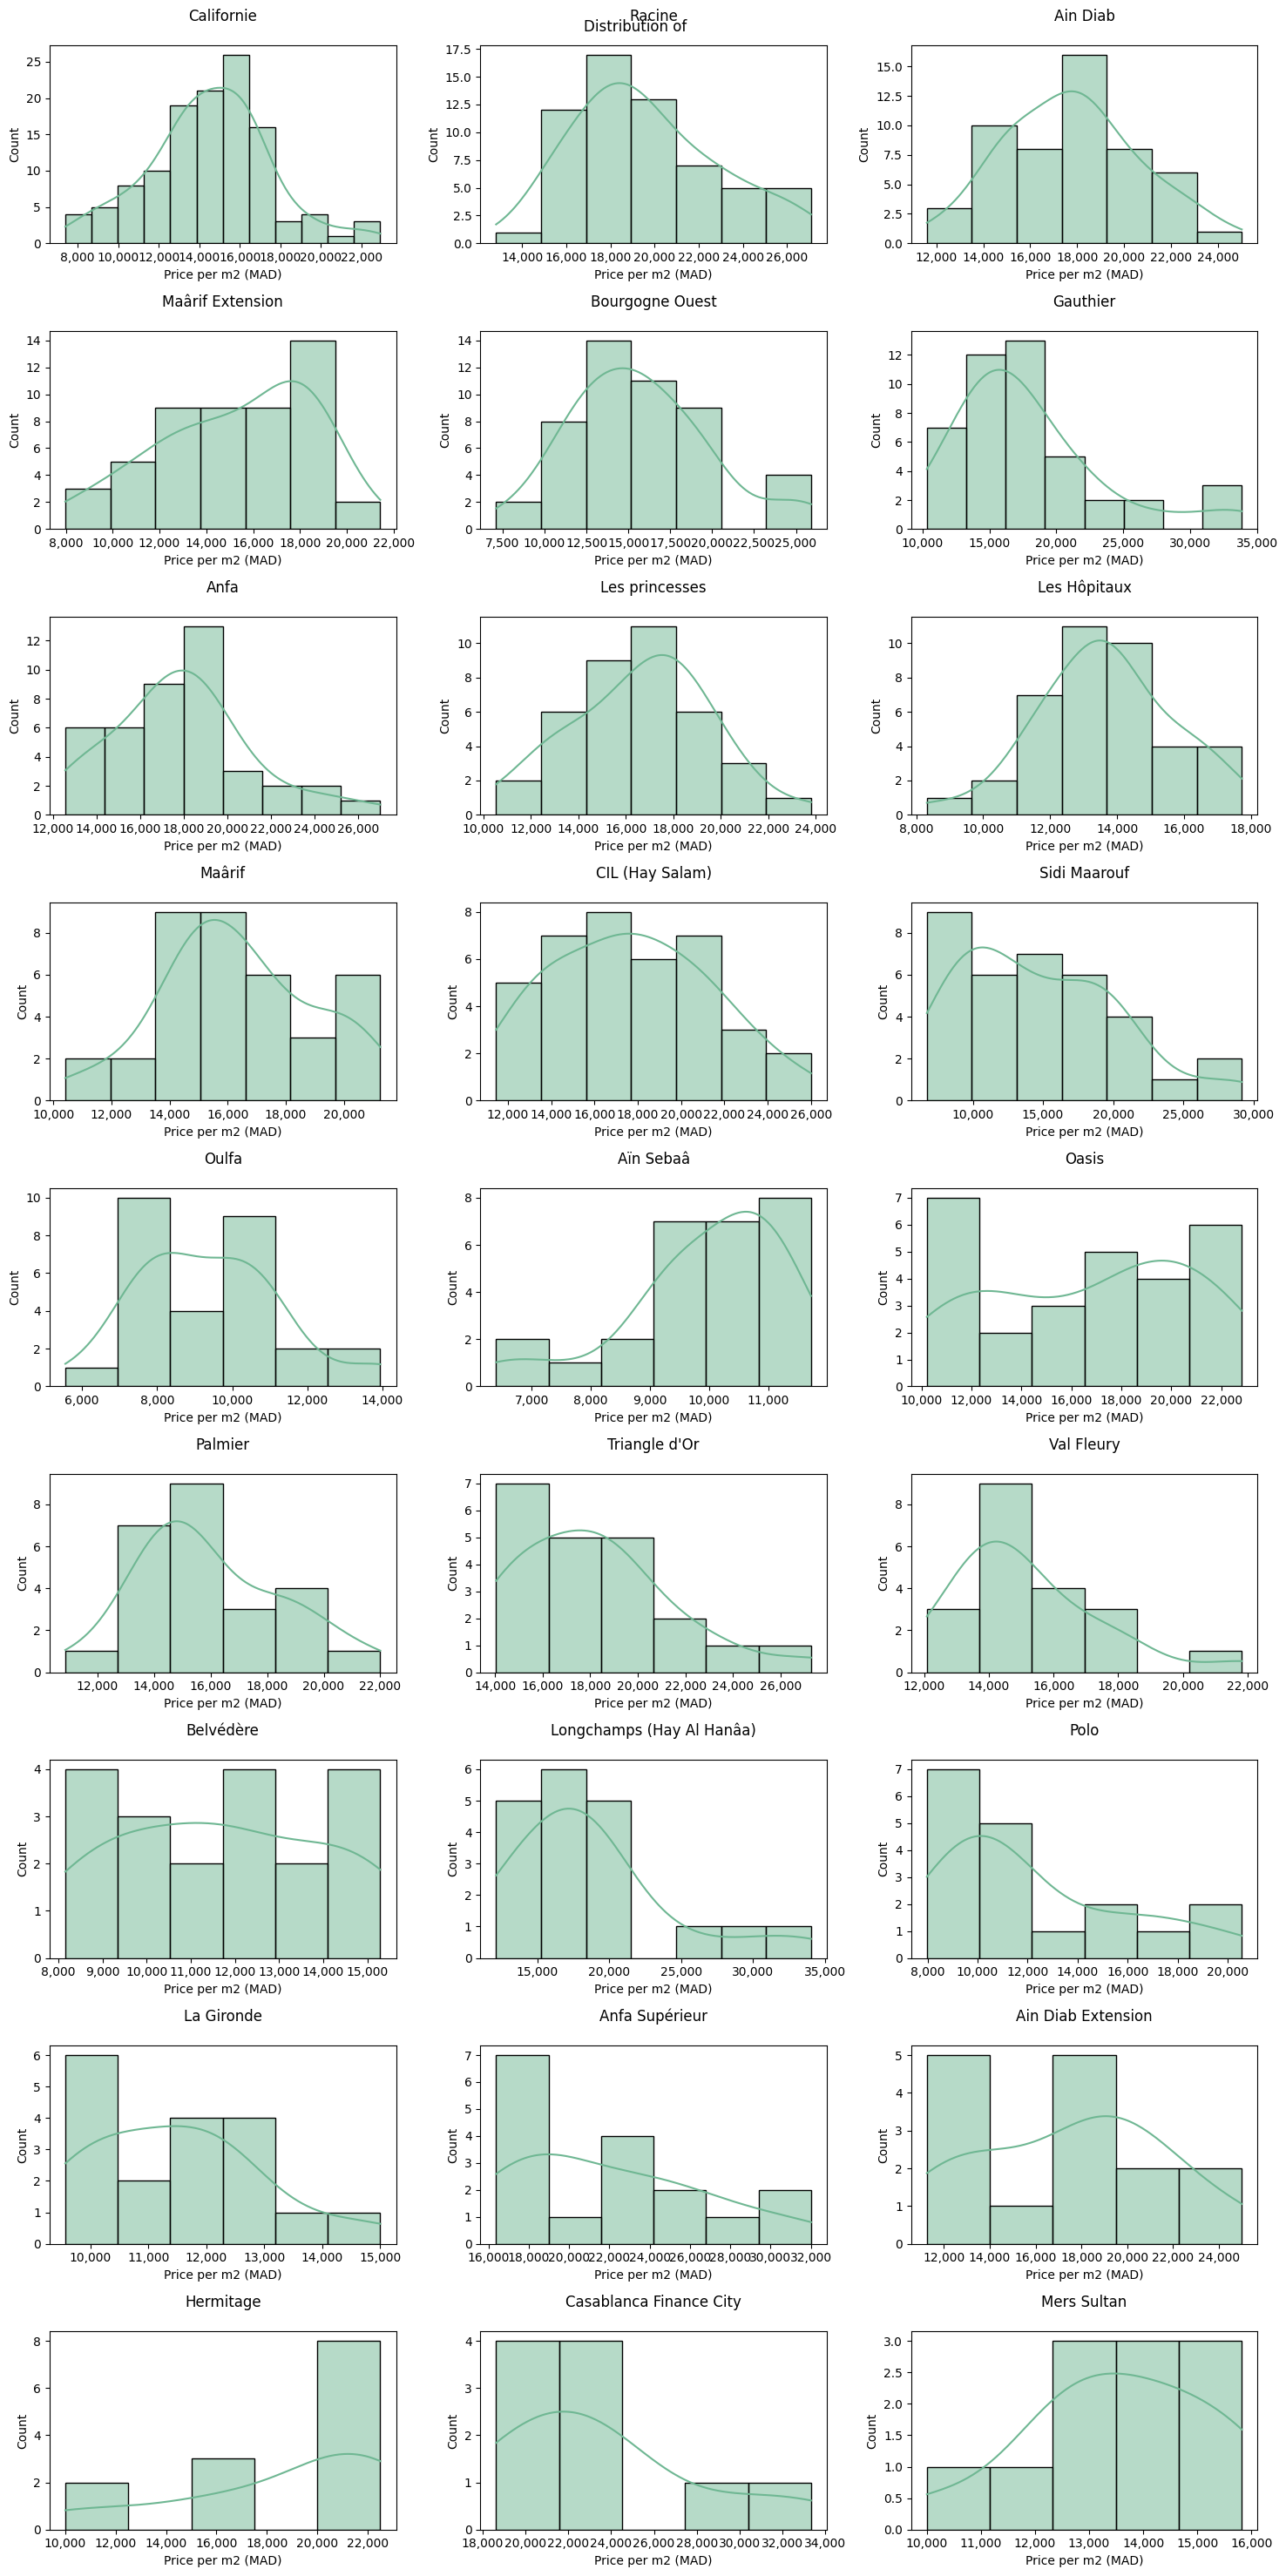

In [80]:
#Plot the distribution of price_m2 by neighbourhood
fig, axes = plt.subplots(9,3,figsize = (15,30))

n = 0
for i in range(9):
    for t in range(3):
        g = sns.histplot(data=df_clean[df_clean.Localisation == (neighbourhoods_kept[n])],
                         x = 'Price_m2',
                         bins = 'auto',
                         kde=True,
                         ax=axes[i,t],
                         color = cust_pal[5])
        g.set_title(f'{neighbourhoods_kept[n]}',pad = 20)
        g.xaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x), ',')))
        g.set_xlabel('Price per m2 (MAD)')
        n+=1

fig.suptitle('Distribution of ')
plt.tight_layout()
plt.show()


C:\Users\R.BENZARIA\AppData\Local\Temp\ipykernel_36784\2427141609.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(data= df_clean,
C:\Users\R.BENZARIA\AppData\Local\Temp\ipykernel_36784\2427141609.py:12: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  g = sns.boxplot(data= df_clean,


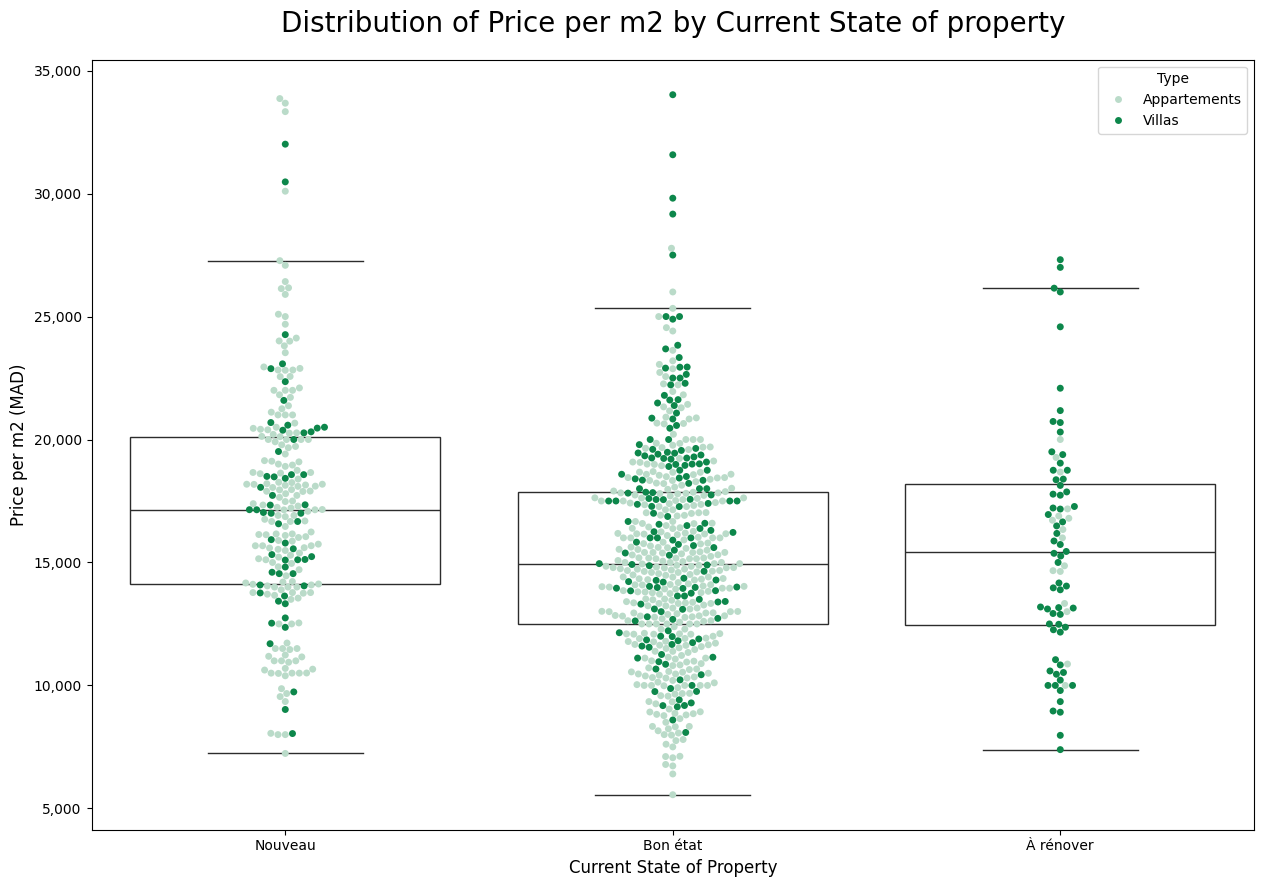

In [81]:
#Average price per m2 by tag
fig, ax = plt.subplots(figsize = (15,10))

#Plot swarm and box for average price by current state variable
g = sns.swarmplot(data= df_clean,
                x = 'Current_state',
                y = 'Price_m2',
                palette = [cust_pal[2],cust_pal[9]],
                ax = ax,
                hue = 'Type',
                order = ['Nouveau','Bon état','À rénover'])
g = sns.boxplot(data= df_clean,
                  x = 'Current_state',
                  y = 'Price_m2',
                  palette = [cust_pal[2],cust_pal[9]],
                  ax = ax,
                  order = ['Nouveau','Bon état','À rénover'],
                  showcaps=True,
                  boxprops={'facecolor':'None'},
                  showfliers=False,
                  whiskerprops={'linewidth':0})
ax.set_title('Distribution of Price per m2 by Current State of property',fontsize = 20,pad = 20)
ax.set_xlabel('Current State of Property',fontsize = 12)
ax.set_ylabel('Price per m2 (MAD)',fontsize = 12)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))

plt.show()

C:\Users\R.BENZARIA\AppData\Local\Temp\ipykernel_36784\3197924174.py:5: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  g = sns.swarmplot(data= df_clean[df_clean.Type == 'Appartements'],
C:\Users\R.BENZARIA\AppData\Local\Temp\ipykernel_36784\3197924174.py:12: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  g = sns.boxplot(data= df_clean[df_clean.Type == 'Appartements'],


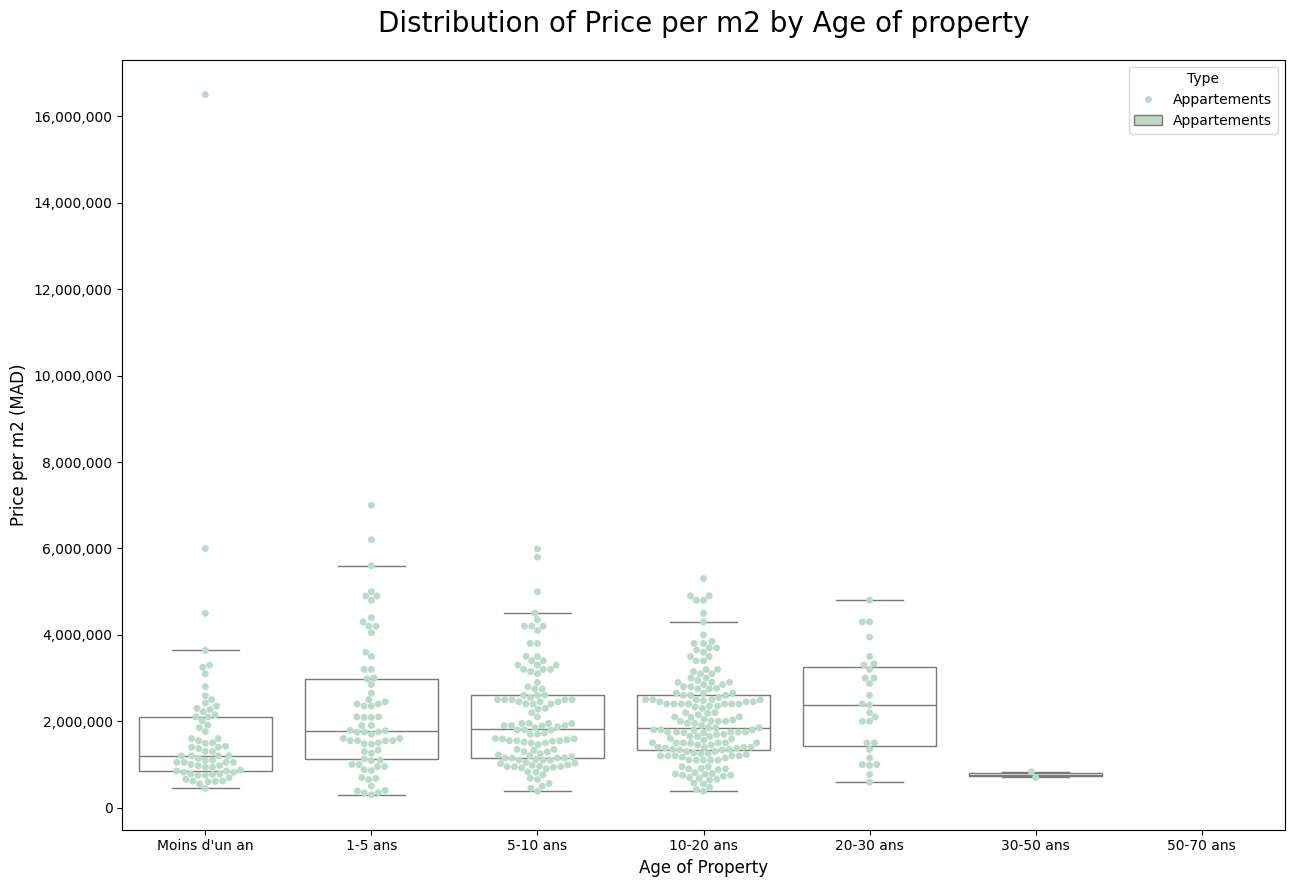

In [82]:
#Plot swarm and box for average price by Age variable

fig, ax = plt.subplots(figsize = (15,10))

g = sns.swarmplot(data= df_clean[df_clean.Type == 'Appartements'], 
                x = 'Age',
                y = 'Price',
                palette = [cust_pal[2],cust_pal[9]],
                ax = ax,
                hue = 'Type',
                order = ["Moins d'un an",'1-5 ans','5-10 ans','10-20 ans','20-30 ans','30-50 ans','50-70 ans'])
g = sns.boxplot(data= df_clean[df_clean.Type == 'Appartements'],
                  x = 'Age',
                  y = 'Price',
                  hue = 'Type',
                  palette = [cust_pal[2],cust_pal[9]],
                  ax = ax,
                  order =  ["Moins d'un an",'1-5 ans','5-10 ans','10-20 ans','20-30 ans','30-50 ans','50-70 ans'],
                  showcaps=True,
                  boxprops={'facecolor':'None'},
                  showfliers=False,
                  whiskerprops={'linewidth':0})
ax.set_title('Distribution of Price per m2 by Age of property',fontsize = 20,pad = 20)
ax.set_xlabel('Age of Property',fontsize = 12)
ax.set_ylabel('Price per m2 (MAD)',fontsize = 12)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))

plt.show()


In [83]:

df_clean.columns


Index(['Type', 'Localisation', 'Price', 'Area', 'Rooms', 'Bedrooms',
       'Bathrooms', 'Floor', 'Other_tags', 'Price_m2', 'Current_state', 'Age'],
      dtype='object')

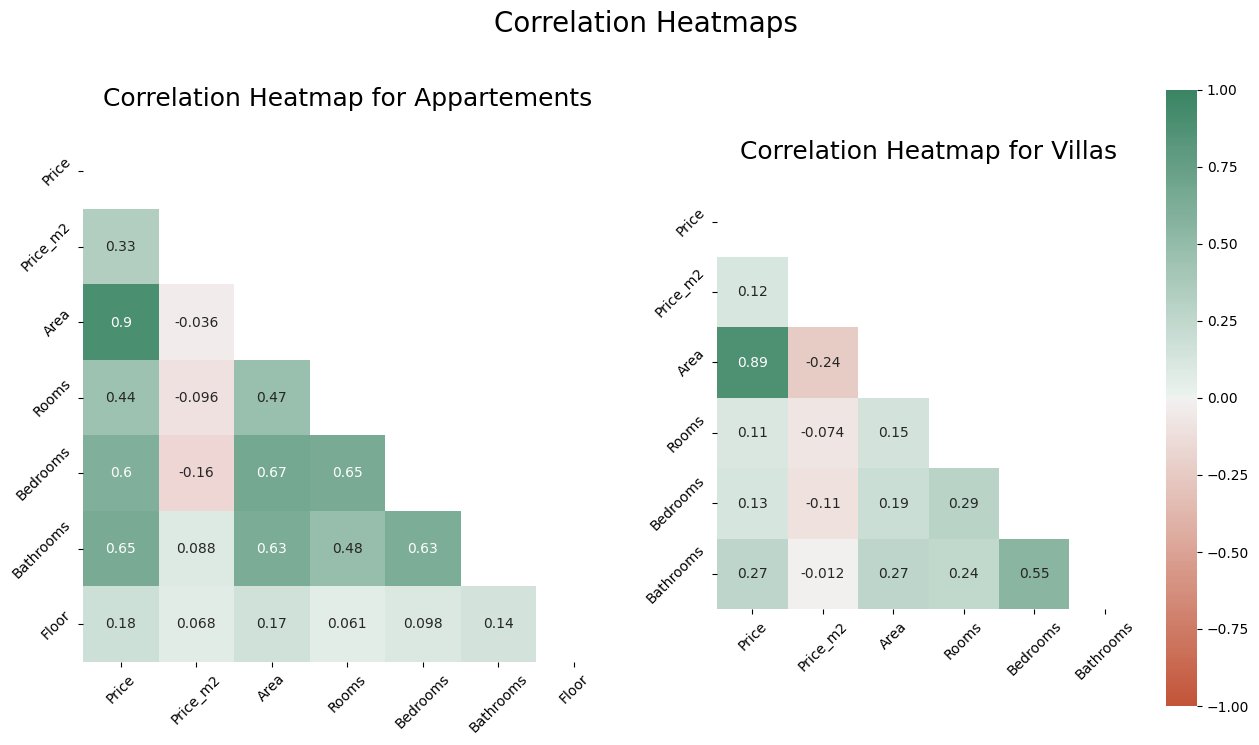

In [85]:
#Plot a correlation matrix

corr_vars_apt = ['Price','Price_m2','Area','Rooms','Bedrooms','Bathrooms','Floor']
corr_vars_vil = ['Price','Price_m2','Area','Rooms','Bedrooms','Bathrooms']

mask_apt = np.triu(np.ones_like(df_clean[corr_vars_apt].corr()))
mask_vil = np.triu(np.ones_like(df_clean[corr_vars_vil].corr()))

corr_mat_apt = df_clean[df_clean.Type == 'Appartements'][corr_vars_apt].corr()
corr_mat_vil = df_clean[df_clean.Type == 'Villas'][corr_vars_vil].corr()

fig, axes = plt.subplots(1,2,figsize = (15,8))
axes[0] = sns.heatmap(corr_mat_apt,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(15, 150, n=500),
                   square=True,annot=True,mask=mask_apt,ax = axes[0],cbar = False)
axes[0].set_title('Correlation Heatmap for Appartements',fontdict = {'fontsize':18},pad=20)
axes[0].tick_params(labelrotation=45)

axes[1] = sns.heatmap(corr_mat_vil,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 150, n=500),
                   square=True,annot=True,mask=mask_vil, ax = axes[1])
axes[1].set_title('Correlation Heatmap for Villas',fontdict = {'fontsize':18},pad=20)
axes[1].tick_params(labelrotation=45)
plt.suptitle('Correlation Heatmaps',fontsize = 20)

#plt.savefig('/Users/Ilyas/Documents/GitHub/Casablanca-House-Prices/EDA_visuals/Correlation_matrix.png')
plt.show()


In [86]:

df_clean.to_csv('mubawab_listings_eda.csv',index=False)